## ПРОЕКТ: ИССЛЕДОВАНИЕ ОБЪЯВЛЕНИЙ О ПРОДАЖЕ КВАРТИР

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Загрузка данных и изучение общей информации. 

## Загрузим данные из файла в датафрейм

Импортируем необходимые библиотеки

In [1]:
# импорт pandas и необходимых библиотек
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

Откроем файл, прочтем и запишем в переменную.

In [2]:
# объявление переменных
real_estate = "dataset.csv"
user_path = "..."
general_path = "..."


# функция для чтения файлов
def get_read_file(general_path, user_path, file, delimiter):
    path1 = os.path.join(general_path, file)
    path2 = os.path.join(user_path, file)

    try:
        if os.path.exists(os.path.join(path1)):
            return pd.read_csv(
                path1,
                sep=delimiter,
            )
        elif os.path.exists(os.path.join(path2)):
            return pd.read_csv(
                path2,
                sep=delimiter,
            )
    except Exception as err:
        print("Путь к файлу не найден!", err)


# чтение csv-файла в датафрейм с сохранением в переменную autos_df
real_estate_df = get_read_file(general_path, user_path, real_estate, "\t")

# сохранение количества строк в переменную
rows_before = real_estate_df.shape[0]

## Изучим общую информацию о полученном датафрейме

In [3]:
# вывод основной информации
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# вывод первых пяти строчек датафрейма
real_estate_df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Выведем информации о полных дубликатах в датафрейме:

In [5]:
# вывод количества полных дубликатов датафрейма
print(real_estate_df.duplicated().sum())

0


## Построим общую гистограмму для всех столбцов датафрейма

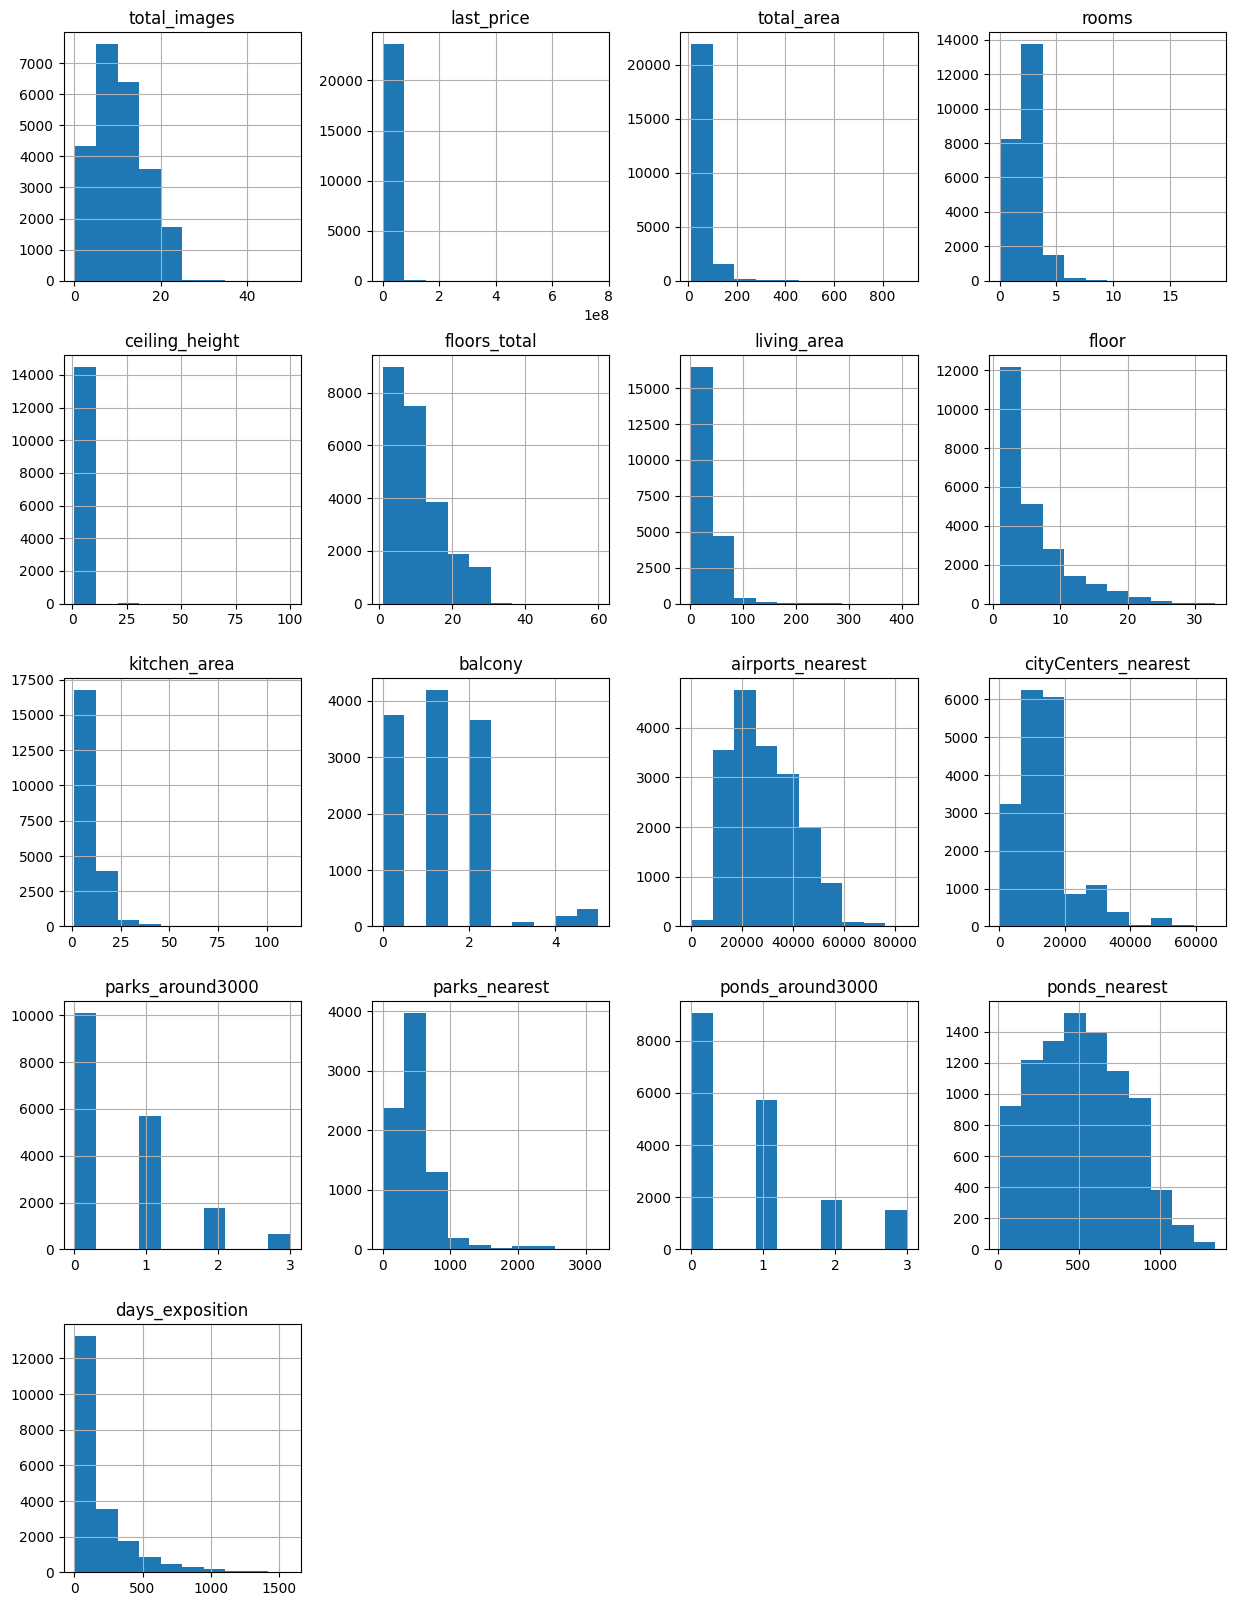

In [6]:
# построение общей гистограммы для всех столбцов
real_estate_df.hist(figsize=(15, 20));

***

**ВЫВОД:**

В результате изучения общей информации о датафрейме обнаружено:

1. Некорректное наименование столбцов:
   - `'cityCenters_nearest'` - сочетание прописных и строчных букв, стиль написания, отличный от "lower_case_with_underscores"
   - `'parks_around3000'` и `'ponds_around3000'` - стиль написания, отличный от "lower_case_with_underscores"
2. Большое количество пропущенных значений в столбцах:
   - `'is_apartment'`
   - `'parks_nearest'`
   - `'ponds_nearest'`
   - `'balcony'`
   - `'ceiling_height'`
   - `'airports_nearest'`
   - `'cityCenters_nearest'`
   - `'parks_around3000'`
   - `'ponds_around3000'`
3. Также пропущены значения в столбцах:
   - `'days_exposition'`
   - `'kitchen_area'`
   - `'living_area'`
   - `'floors_total'`
   - `'locality_name'`
4. Неправильный тип данных в столбцах:
   - `'last_price'`
   - `'total_area'`
   - `'first_day_exposition'`
   - `'ceiling_height'`
   - `'floors_total'`
   - `'living_area'`
   - `'is_apartment'`
   - `'kitchen_area'`
   - `'balcony'`
   - `'locality_name'`
   - `'airports_nearest'`
   - `'cityCenters_nearest'`
   - `'parks_around3000'`
   - `'parks_nearest'`
   - `'ponds_around3000'`
   - `'ponds_nearest'`
   - `'days_exposition'`
5. Явные аномалии или выбросы присутствуют в столбцах:
   - `'last_price'`
   - `'ceiling_height'`
   - `'floors_total'`
   - `'total_area'`
   - `'living_area'`
   - `'kitchen_area'`
   - `'days_exposition'`
6. Явные дубликаты в датафрейме отсутствуют.

# Предобработка данных

## Предобработка пропущенных значений

Сначала исправим нейминг в столбцах:

In [7]:
# переименование столбцов датафрейма
real_estate_df = real_estate_df.rename(
    columns={
        'cityCenters_nearest': 'city_centers_nearest',
        'parks_around3000': 'parks_around_3000',
        'ponds_around3000': 'ponds_around_3000'
    }
)

Определим, в каких столбцах датафрейма есть пропуски, и посчитаем их

In [8]:
# вывод количества пропущенных значений для каждого столбца
real_estate_df.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_centers_nearest     5519
ponds_around_3000        5518
parks_around_3000        5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Посчитаем долю пропущенных значений в каждом столбце

In [9]:
# вывод доли пропущенных значений для каждого столбца
real_estate_df.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around_3000       23.283683
parks_nearest           65.909954
ponds_around_3000       23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

 К пропускам в данных могли привести следующие причины:
> - Пользователь не заполнил данные случайно (просто пропустил):
>   - `'locality_name'`
>   - `'floors_total'`
> - Пользователь не заполнил данные, потому что не знал:
>   - `'ceiling_height'`
>   - `'kitchen_area'`
>   - `'living_area'`
> - Пользователь не заполнил данные там, где должен был указать "0" или "False":
>   - `'is_apartment'`
>   - `'balcony'`
> - Данные заполняются автоматически и ещё не заполнены:
>   - `'days_exposition'`

 Вероятно, пропуски в столбцах:
   - `'airports_nearest'`
   - `'city_centers_nearest'`
   - `'parks_around_3000'`
   - `'ponds_around_3000'`

допущены одними и теми же пользователями -  
 это можно предположить по практически одинаковому количеству пропусков.

Также проверим столбцы:
   - `'parks_nearest'`
   - `'ponds_nearest'`

по-скольку они связаны со столбцами `'parks_around_3000'` и `'ponds_around_3000'`

Посчитаем долю пропущенных значений в каждом столбце

In [10]:
# вывод доли пропущенных значений для каждого столбца
real_estate_df.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around_3000       23.283683
parks_nearest           65.909954
ponds_around_3000       23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

 К пропускам в данных могли привести следующие причины:
> - Пользователь не заполнил данные случайно (просто пропустил):
>   - `'locality_name'`
>   - `'floors_total'`
> - Пользователь не заполнил данные, потому что не знал:
>   - `'ceiling_height'`
>   - `'kitchen_area'`
>   - `'living_area'`
> - Пользователь не заполнил данные там, где должен был указать "0" или "False":
>   - `'is_apartment'`
>   - `'balcony'`
> - Данные заполняются автоматически и ещё не заполнены:
>   - `'days_exposition'`

 Вероятно, пропуски в столбцах:
   - `'airports_nearest'`
   - `'city_centers_nearest'`
   - `'parks_around_3000'`
   - `'ponds_around_3000'`

допущены одними и теми же пользователями -  
 это можно предположить по практически одинаковому количеству пропусков.

Также проверим столбцы:
   - `'parks_nearest'`
   - `'ponds_nearest'`

по-скольку они связаны со столбцами `'parks_around_3000'` и `'ponds_around_3000'`

Проверим это предположение, выделив только пропущенные значения для столбца `'airports_nearest'`\
и посчитаем в полученных строках датафрейма пропущенные значения только по нужным столбцам

In [11]:
# объявление списка столбцов
lst_columns = [
    'airports_nearest',
    'city_centers_nearest',
    'parks_around_3000',
    'ponds_around_3000',
    'parks_nearest',
    'ponds_nearest'
]
# подсчет пропущенных значений в строках с пропущенными значениями по столбцу 'airports_nearest'
real_estate_df[lst_columns][real_estate_df['airports_nearest'].isna()].isna().sum()

airports_nearest        5542
city_centers_nearest    5518
parks_around_3000       5518
ponds_around_3000       5518
parks_nearest           5522
ponds_nearest           5534
dtype: int64

Действительно, пропускам в столбце `'airports_nearest'` соответствуют пропуски в других столбцах.\
Возможно, пользователи не могут указать эти данные, по-скольку проживают не в Санкт-Петербурге.

Проверим это предположение, добавив условие к столбцу `'locality_name'`

In [12]:
# подсчет пропущенных значений в строках с пропущенными значениями по столбцу 'airports_nearest'
# и условием для столбца 'locality_name'
(
    real_estate_df[lst_columns]
    [(real_estate_df['airports_nearest'].isna())
    & (real_estate_df['locality_name'] != 'Санкт-Петербург')]
    .isna().sum()
)

airports_nearest        5457
city_centers_nearest    5457
parks_around_3000       5457
ponds_around_3000       5457
parks_nearest           5457
ponds_nearest           5457
dtype: int64

Действительно, практически все пропуски в данных столбцах связаны с тем, что квартиры находятся не в Санкт-Перербурге.

Кроме того, вероятно, пропуски в столбцах:
   - `'parks_nearest'`
   - `'ponds_nearest'`

связаны со значением "0" в столбцах `'parks_around_3000'` и `'ponds_around_3000'`

Проверим это предположение:

In [13]:
# объявление словаря
dict_columns = {'parks_around_3000': 'parks_nearest', 'ponds_around_3000': 'ponds_nearest'}
# подсчёт значений
for column1, column2 in dict_columns.items():
    print(f'Количество значений "0" в столбце "{column1}":')
    print(*real_estate_df[[column1]][real_estate_df[column1] == 0].count())
    print('-------')
    print(f'Для значения "0" в столбце "{column1}" количество пропущенных значений в столбце "{column2}":')
    print(*real_estate_df[[column2]][real_estate_df[column1] == 0].isna().sum())
    print('')

Количество значений "0" в столбце "parks_around_3000":
10106
-------
Для значения "0" в столбце "parks_around_3000" количество пропущенных значений в столбце "parks_nearest":
10102

Количество значений "0" в столбце "ponds_around_3000":
9071
-------
Для значения "0" в столбце "ponds_around_3000" количество пропущенных значений в столбце "ponds_nearest":
9071



Действительно, не указаны расстояния там, где нет объекта.

***

**Вывод:**

1. В данных значительное количество пропусков
2. Большая часть пропусков допущена пользователями.
3. Есть взаимозависимые значения, так что если в одном значении записан "0", то в другом будет пропуск.
4. Были переименованы столбцы с некорректными наименованиями:
   - `'cityCenters_nearest'` в `'city_centers_nearest'`
   - `'parks_around3000'` в `'parks_around_3000'`
   - `'ponds_around3000'` в `'ponds_around_3000'`

### Предобработка пропущенных значений: удаление

Пропущенных значений в столбцах `'floors_total'` и `'locality_name'` так мало,\
что можно удалить строки с пропусками в этих столбцах.

In [14]:
# подсчёт процента пропущенных значений
for column in ['floors_total', 'locality_name']:
    print(f'Пропущенных значений в столбце '
          f'{column} - '
          f'{round(real_estate_df[column].isna().mean()*100, 2)}%')

Пропущенных значений в столбце floors_total - 0.36%
Пропущенных значений в столбце locality_name - 0.21%


In [15]:
# удаление пропущенных значений в столбцах
for column in ['floors_total', 'locality_name']:
    real_estate_df = real_estate_df.dropna(subset=[column]).reset_index(drop=True)

*-----------*

Проверим, пропущены ли картографические значения для Санкт-Петербурга.

In [16]:
# вывод количества строк среза по условиям
print(
    real_estate_df
    .query(
        'locality_name == "Санкт-Петербург" and '
        'city_centers_nearest.isna() and airports_nearest.isna()'
    )['locality_name']
    .count()
)

60


Такое количество пропусков можно удалить.

In [17]:
# перезапись датафрейма
real_estate_df = (
    real_estate_df[
        ~((real_estate_df['locality_name'] == 'Санкт-Петербург') & 
        (real_estate_df['city_centers_nearest'].isna()) & 
        (real_estate_df['airports_nearest'].isna()))
    ].reset_index(drop=True)
)

Проверим удаление:

In [18]:
# вывод количества пропущенных значений
real_estate_df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9055
floors_total                0
living_area              1850
floor                       0
is_apartment            20750
studio                      0
open_plan                   0
kitchen_area             2207
balcony                 11435
locality_name               0
airports_nearest         5464
city_centers_nearest     5441
parks_around_3000        5440
parks_nearest           15475
ponds_around_3000        5440
ponds_nearest           14469
days_exposition          3136
dtype: int64

***

**Вывод:**

1. Некоторые пропуски в значениях из-за их небольшого количества\
   удалось просто удалить:
   - `'floors_total'`
   - `'locality_name'`
   - `'city_centers_nearest'` для объектов в Санкт-Петербурге
   - `'airports_nearest'` для объектов в Санкт-Петербурге

### Предобработка пропущенных значений: замена на "0" и заполнение

Скорее всего, если продавец не указал количество балконов, то их нет.\
Заменим пропуски на "0".

In [19]:
# заполнение пропусков в столбце 'balcony'
real_estate_df['balcony'] = real_estate_df['balcony'].fillna(value=0)

*-----------*

Скорее всего, если продавец не указал, что продаваемый объект - это апартаменты, то это не апартаменты.\
Заменим пропуски на "0"

In [20]:
# заполнение пропусков в столбце 'is_apartment'
real_estate_df['is_apartment'] = real_estate_df['is_apartment'].fillna(value=0)

*-----------*

Обработаем пропуски в столбце `'kitchen_area'`:

- если продавец не указал площадь кухни в апартаментах,\
  то скорее всего кухни там нет;

Таких помещений:

In [21]:
# подсчет пропусков по условию
print(real_estate_df[real_estate_df['is_apartment'] == True]['kitchen_area'].isna().sum())

15


- если на продажу была выставлена студия,\
  то вероятнее всего площадь кухни не была выделена:

In [22]:
# подсчет студий в датафрейме
print(f'Студий - {real_estate_df[real_estate_df["studio"] == True]["studio"].count()}')
# подсчет пропусков по условию
print(f'Пропусков в "kitchen_area" для студий - '
      f'{real_estate_df[real_estate_df["studio"] == True]["kitchen_area"].isna().sum()}')

Студий - 146
Пропусков в "kitchen_area" для студий - 146


Заполним эти значения "0"

In [23]:
# заполнение пропусков в столбце 'kitchen_area'значением 0
real_estate_df.loc[
    ((real_estate_df['is_apartment'] == True) | 
     (real_estate_df['studio'] == True)) & 
    (real_estate_df['kitchen_area'].isna()), 'kitchen_area'] = real_estate_df['kitchen_area'].fillna(value=0)

<a id='kitchen_area'></a>
Остальные пропуски в `'kitchen_area'` можно заполнить медианными значениями для общей площади,\
либо разницей между общей и жилой площадью, если жилая площадь определена.

Так как разброс значений общей площади значительный,\
выделим числовые диапазоны для рассчета медианы и присвоения значения.

Для меньшей площади более критично точное определение размера `'kitchen_area'`\
поэтому пусть шаг для разбивки для маленькой общей площади будет\
от минимальной общей площади до её полуторного размера.

Далее шаг будем увеличивать для каждой следующей группы значений в 1,5 раза.

Исключим из среза датафрейма для подсчета медианы студии и апартаменты.

In [24]:
# объявление переменных с наименьшей и наибольшей общей площадью
min_size = real_estate_df['total_area'].min()
max_size = real_estate_df['total_area'].max()

# заполнение пропусков по группам в цикле
while min_size <= max_size:
    
    nan_df = real_estate_df[real_estate_df['kitchen_area'].isna()]  # объявление датафрейма с пропусками
    
    slice_nan_df = real_estate_df.query(
        'total_area>=@min_size & total_area<@min_size*1.5 & kitchen_area.isna()'
    )  # получение среза датафрейма с пропусками с шагом в 1,5 min_size по 'total_area'
    
    for ind in nan_df.index:  # обработка строк датафрейма и среза датафрейма с пропусками в цикле
        for idx in slice_nan_df.index:
        
            if ind == idx:  # проверка соответствия индексов

                median_df = real_estate_df.query(
                    'total_area>=@min_size & total_area<@min_size*1.5 & is_apartment==False & studio==False'
                )  # получение среза датафрейма с шагом в 1,5 min_size по 'total_area' для рассчета медианы

                median_of_slice = round(median_df['kitchen_area'].median(), 2)  # рассчет и округление медианы среза

                real_estate_df.loc[ind, 'kitchen_area'] = min(
                    median_of_slice,
                    (real_estate_df.loc[ind, 'total_area']-real_estate_df.loc[ind, 'living_area'])
                )  # присвоение значения ячейке датафрейма
            
    min_size *= 1.5  # переход к следующему шагу для получения среза датафрейма

*-----------*

<a id='living_area'></a>
Таким же образом можно заполнить пропуски в `'living_area'` -\
медианными значениями по срезам общей площади.

При заполнении учтем, что сумма жилой площади и кухни\
не должна превышать общую площадь квартиры.

In [25]:
# обновление значения переменной
min_size = real_estate_df['total_area'].min()

# заполнение пропусков по группам в цикле
while min_size <= max_size:
    
    nan_df = real_estate_df[real_estate_df['living_area'].isna()]  # объявление датафрейма с пропусками
    
    slice_nan_df = real_estate_df.query(
        'total_area>=@min_size & total_area<@min_size*1.5 & living_area.isna()'
    )  # получение среза датафрейма с пропусками с шагом в 1,5 min_size по 'total_area'
    
    for ind in nan_df.index:  # обработка строк датафрейма и среза датафрейма с пропусками в цикле
        for idx in slice_nan_df.index:
            
            if ind == idx:  # проверка соответствия индексов датафрейма и среза датафрейма

                median_df = real_estate_df.query(
                    'total_area>=@min_size & total_area<@min_size*1.5 & is_apartment==False & studio==False'
                )  # получение среза датафрейма с шагом в 1,5 min_size по 'total_area' для рассчета медианы
               
                median_of_slice = round(median_df['living_area'].median(), 2)  # рассчет и округление медианы среза

                real_estate_df.loc[ind, 'living_area'] = min(
                    median_of_slice,
                    (real_estate_df.loc[ind, 'total_area'] - real_estate_df.loc[ind, 'kitchen_area'])
                )  # присвоение значения ячейке датафрейма

    min_size *= 1.5  # переход к следующему шагу для получения среза датафрейма

*-----------*

Заполним значением "0" не указанное количество парков и озер для квартир,\
находящихся не в Санкт-Петербурге.

In [26]:
# заполнение пропусков в 'parks_around_3000' и 'ponds_around_3000'
real_estate_df.loc[real_estate_df['locality_name'] != 'Санкт-Петербург', 'parks_around_3000'] = (
    real_estate_df['parks_around_3000'].fillna(value=0)
)
real_estate_df.loc[real_estate_df['locality_name'] != 'Санкт-Петербург', 'ponds_around_3000'] = (
    real_estate_df['ponds_around_3000'].fillna(value=0)
)

***

**Вывод:**

1. Некоторые пропуски в значениях были заполнены значением "0":
   - количество балконов в `'balcony'`
   - `'is_apartment'`
   - `'kitchen_area'` в апартаментах и студиях
   - `'parks_around_3000'` для объектов не в Санкт-Петербурге
   - `'ponds_around_3000'` для объектов не в Санкт-Петербурге
2. Некоторые пропуски были заполнены медианными значениями с применением различных условий:
   - `'kitchen_area'` не в апартаментах и студиях
   - `'living_area'` не в апартаментах и студиях

## Изменение типа данных

Преобразуем тип данных столбца `'first_day_exposition'` в Datetime

In [27]:
# преобразование типа данных в формат даты
real_estate_df['first_day_exposition'] = pd.to_datetime(real_estate_df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

*-----------*

Преобразуем тип данных столбцов `'balcony'` и `'floors_total'` в целочисленный тип.\
Балконов и этажей не может быть дробное количество.

In [28]:
# приведение столбцов к целочисленному типу
real_estate_df[['balcony', 'floors_total']] = (
    real_estate_df[['balcony', 'floors_total']].astype('Int64')
)

*-----------*

Приведем столбец `'is_apartment'` к булеву типу (указано в документации).

In [29]:
# приведение столбца к булеву типу
real_estate_df['is_apartment'] = real_estate_df['is_apartment'].astype('bool')

*-----------*

Преобразуем тип данных столбцов:
 - `'airports_nearest'`
 - `'city_centers_nearest'`
 - `'parks_around_3000'`
 - `'parks_nearest'`
 - `'ponds_around_3000'`
 - `'ponds_nearest'`
 - `'days_exposition'`
 
в целочисленный.

Парков и прудов не может быть дробное количество.\
Расстояния в данном контексте с точностью до сантиметров не требуются.\
Дни размещения объявления также достаточно указать в целых днях.

Так как данные в этих столбцах имеют пропуски,\
при преобразовании эти пропуски сохраним.

In [30]:
# создание списка столбцов для преобразования типа
convers_lst = [
    'airports_nearest',
    'city_centers_nearest',
    'parks_around_3000',
    'parks_nearest',
    'ponds_around_3000',
    'ponds_nearest',
    'days_exposition'
]
# преобразование типа данных в столбцах
for colunm in convers_lst:
    real_estate_df[colunm] = real_estate_df[colunm].fillna(-1).astype(int).replace(-1, np.nan).astype('Int64')

*-----------*

Для удобства исследования данных изменим единицу измерения в столбце `'last_price'`:\
с рублей на миллионы рублей:

In [31]:
real_estate_df['last_price'] = real_estate_df['last_price']/1000000

Проверим преобразование

In [32]:
# вывод информации о датафрейме
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23505 entries, 0 to 23504
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23505 non-null  int64         
 1   last_price            23505 non-null  float64       
 2   total_area            23505 non-null  float64       
 3   first_day_exposition  23505 non-null  datetime64[ns]
 4   rooms                 23505 non-null  int64         
 5   ceiling_height        14450 non-null  float64       
 6   floors_total          23505 non-null  Int64         
 7   living_area           23505 non-null  float64       
 8   floor                 23505 non-null  int64         
 9   is_apartment          23505 non-null  bool          
 10  studio                23505 non-null  bool          
 11  open_plan             23505 non-null  bool          
 12  kitchen_area          23505 non-null  float64       
 13  balcony         

***

**Вывод:**

1. Были преобразованы типы данных в столбцах:
   - `'first_day_exposition'` в datetime64[ns]
   - `'balcony'` в Int64
   - `'floors_total'` в Int64
   - `'is_apartment'` в bool
2. Были преобразованы типы данных в Int64 с сохранением пропусков:
   - `'airports_nearest'`
   - `'city_centers_nearest'`
   - `'parks_around_3000'`
   - `'parks_nearest'`
   - `'ponds_around_3000'`
   - `'ponds_nearest'`
   - `'days_exposition'`
3. Была изменена единица измерения в столбце `'last_price'`

## Удаление дубликатов в названиях населённых пунктов

Изучим уникальные значения в столбце `'locality_name'` и найдем их количество

In [33]:
# вывод списка уникальных значений столбца
print(real_estate_df['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [34]:
# вывод количества уникальных значений столбца
real_estate_df['locality_name'].nunique()

364

<a id='fun'></a>
Для дальнейшей сортировки преобразуем название населенного пункта так,\
чтобы название было первым, а тип населенного пункта вторым.

Также приведем все варианты написания типа населенного пункта к виду "посёлок"

In [35]:
# функция, преобразующая строку с названием
def transpose(transpose_lst):
    lst_for_title = []
    lst_for_low = []
    for word in transpose_lst:
        if word.istitle():
            lst_for_title.append(word)
        else:
            lst_for_low.append(word)
    if 'поселок' in lst_for_low or 'посёлок' in lst_for_low:
        lst_for_low = ['посёлок']
    lst_for_title.extend(lst_for_low)
    return ' '.join(lst_for_title)

# приведение названия населенного пункта
real_estate_df['locality_name'] = real_estate_df['locality_name'].apply(lambda x: transpose(x.split(' ')))

Выведем количество уникальных значений столбца.

Выведем полученный список названий в отсортированном виде.

In [36]:
# вывод количества уникальных значений столбца
real_estate_df['locality_name'].nunique()

318

In [37]:
# вывод списка названий населенных пунктов
print(*[name + '\n' for name in real_estate_df['locality_name'].sort_values().unique()])

Агалатово деревня
 Александровская посёлок
 Алексеевка посёлок
 Аннино посёлок
 Аро деревня
 Барышево посёлок
 Батово деревня
 Бегуницы деревня
 Белогорка деревня
 Белоостров посёлок
 Бокситогорск
 Большая Вруда деревня
 Большая Ижора посёлок
 Большая Пустомержа деревня
 Большие Колпаны деревня
 Большое Рейзино деревня
 Большой Сабск деревня
 Бор деревня
 Борисова Грива деревня
 Бугры посёлок
 Будогощь посёлок
 Ваганово деревня
 Важины посёлок
 Вартемяги деревня
 Вахнова Кара деревня
 Вещево посёлок
 Виллози посёлок
 Вознесенье посёлок
 Возрождение посёлок
 Войсковицы посёлок
 Войскорово посёлок
 Володарское посёлок
 Волосово
 Волхов
 Всеволожск
 Выборг
 Вырица посёлок
 Выскатка деревня
 Высокоключевой посёлок
 Высоцк
 Гаврилово посёлок
 Гарболово деревня
 Гарболово посёлок
 Гатчина
 Гладкое посёлок
 Глажево посёлок
 Глебычево посёлок
 Глинка деревня
 Гончарово посёлок
 Горбунки деревня
 Гостилицы деревня
 Громово посёлок
 Дзержинского посёлок
 Дружная Горка посёлок
 Дружноселье посёло

Уникальных значений стало меньше на 46, а список значений стало проще сортировать.

***

**Вывод:**

1. Были устранены неявные дубликаты в названиях населенных пунктов
2. Названия населенных пунктов были перезаписаны
3. Уникальных названий стало на 46 меньше

## Поиск и устранение аномалий

Проверим столбец `'ceiling_height'` на наличие выбросов методом ***describe()***

In [38]:
# вывод числового описания данных
real_estate_df['ceiling_height'].describe()

count    14450.000000
mean         2.770833
std          1.263222
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Максимальное значение в столбце - 100 метров.

Найдем аномальные значения для столбца `'ceiling_height'`

Так как высота потолков элитного жилья не более 10,3 метров,\
найдем значения выше этого показателя.

А также посчитаем количество аномальных значений.

In [39]:
# вывод уникальных аномальных значений столбца
print(*real_estate_df['ceiling_height'][real_estate_df['ceiling_height'] > 10.3].unique())

25.0 32.0 27.0 24.0 26.0 14.0 20.0 22.6 27.5 100.0


In [40]:
# количество аномальных значений столбца
print(real_estate_df['ceiling_height'][real_estate_df['ceiling_height'] > 10.3].count())

24


Логично предположить, что пользователи не поставили точку в значениях.\
Таким образом нужно привести значения к нормальному виду, разделив их на 10.

In [41]:
# исправление аномальных значений столбца
real_estate_df['ceiling_height'] = np.where(
    real_estate_df['ceiling_height'] > 10,
    round(real_estate_df['ceiling_height']/10, 2),
    real_estate_df['ceiling_height'])

Обратим внимание на минимальную высоту потолка - всего 1 метр.

Допустимой в отдельных случаях минимальной высотой потолка\
в жилых помещениях является высота в 2,3 метра.

Примем за границу аномальных значений высоту в 2 метра\
и посчитаем аномальные значения:

In [42]:
# количество аномальных значений столбца
print(real_estate_df[real_estate_df['ceiling_height'] < 2]['ceiling_height'].count())

5


Таких значений мало, удалим их.

In [43]:
# перезапись датафрейма без строк столбца с аномалиями
real_estate_df = real_estate_df[~(real_estate_df['ceiling_height'] < 2)]

*-----------*

Проверим столбец `'living_area'` на наличие выбросов методом ***describe()***

In [44]:
# вывод числового описания данных
real_estate_df['living_area'].describe()

count    23500.000000
mean        34.574665
std         22.274538
min          2.000000
25%         18.600000
50%         30.000000
75%         43.000000
max        409.700000
Name: living_area, dtype: float64

Минимальное значение в столбце - 2 кв.м

Жилая площадь квартир по нормам 2024 года\
не может составлять менее 14 кв.м.

Так как квартиры строились ранее,\
примем за границу минимально допустимой жилой площади 8 кв.м\
и найдем значения менее этого показателя.

А также посчитаем количество аномальных значений.

In [45]:
# вывод уникальных аномальных значений столбца
print(*real_estate_df['living_area'][real_estate_df['living_area'] < 8].unique())

3.0 2.0 6.0 5.0 6.5 5.4


In [46]:
# количество аномальных значений столбца
print(real_estate_df['living_area'][real_estate_df['living_area'] < 8].count())

8


Такое количество аномальных значений можно удалить.

In [47]:
# перезапись датафрейма без строк столбца с аномалиями
real_estate_df = real_estate_df[real_estate_df['living_area'] >= 8].reset_index(drop=True)

*-----------*

<a id='area'></a>
Проверим корректность указания площадей продаваемой квартиры:\
сумма площади кухни и жилой площади не может быть больше,\
чем общая площадь помещения.

In [48]:
# запись в переменную отвечающих условиям строк
df_area = (
    (real_estate_df[(real_estate_df['kitchen_area'] + real_estate_df['living_area']) > real_estate_df['total_area']]).copy()
)
# создание столбца с указанием превышения
df_area['excees'] = real_estate_df['kitchen_area'] + real_estate_df['living_area'] - real_estate_df['total_area']
# вывод численного описания
df_area['excees'].describe()

count    64.000000
mean      6.366406
std       5.616532
min       0.200000
25%       2.250000
50%       5.615000
75%       8.150000
max      29.800000
Name: excees, dtype: float64

Поскольку разброс значений превышения большой,\
рассмотрим превышения более, чем на 20% от общей площади.

In [49]:
# вывод датафрейма по условиям
df_area[df_area['excees'] > df_area['total_area']*0.2][['total_area', 'living_area', 'kitchen_area', 'excees']]

,total_area,living_area,kitchen_area,excees
547,31.59,30.55,9.28,8.24
689,34.69,23.43,23.43,12.17
1396,24.60,18.00,18.20,11.60
1977,37.40,36.40,8.60,7.60
4330,47.70,39.80,28.20,20.30
6747,69.00,64.00,25.00,20.00
7183,90.00,76.40,43.40,29.80
7693,20.67,14.95,14.95,9.23
10826,43.30,40.70,12.30,9.70
11220,37.00,35.00,16.00,14.00


Так как таких данных немного, их можно удалить.

In [50]:
# перезапись датафрейма без строк столбца с аномалиями
real_estate_df = (
    real_estate_df[(real_estate_df['kitchen_area']+real_estate_df['living_area'])<=real_estate_df['total_area']*1.2].reset_index(drop=True)
)

Оставшиеся в датафрейме аномалии площадей обработаем.

Поскольку не известно, в каких именно данных допущена ошибка,\
можно уменьшить площадь `'living_area'` и `'kitchen_area'` пропорционально.

In [51]:
# объявление среза по условиям
excess_slice = real_estate_df.query('(kitchen_area+living_area)>total_area')

# обработка строк и запись новых значений
for idx in excess_slice.index:
    
    part = (
        real_estate_df.loc[idx, 'kitchen_area'] / 
        (real_estate_df.loc[idx, 'kitchen_area']+real_estate_df.loc[idx, 'living_area'])
    )  # вычисление доли площади кухни в общей вычисленной площади
    
    excess = (
        real_estate_df.loc[idx, 'kitchen_area'] +
        real_estate_df.loc[idx, 'living_area'] -
        real_estate_df.loc[idx, 'total_area']
    )  # вычисление превышения над общей площадью
    
    real_estate_df.loc[idx, 'kitchen_area'] = (
        round(real_estate_df.loc[idx, 'kitchen_area']-excess*part, 2)
    )  # присвоение по вычисленным значениям
    
    real_estate_df.loc[idx, 'living_area'] = (
        real_estate_df.loc[idx, 'total_area']-real_estate_df.loc[idx, 'kitchen_area']
    )

*-----------*

Обратим внимание этажность домов.\
В Санкт-Петербурге и области на данный момент отсутствуют\
жилые дома выше 37 этажей.

In [52]:
# вывод численного описания столбца
real_estate_df['floors_total'].describe()

count      23479.0
mean     10.670812
std       6.591104
min            1.0
25%            5.0
50%            9.0
75%           16.0
max           60.0
Name: floors_total, dtype: Float64

Максимум этажности в данных - 60 этажей.\
Строк с такими значениями:

In [53]:
print(real_estate_df[real_estate_df['floors_total']>37]['floors_total'].count())

2


Удалим их:

In [54]:
# перезапись датафрейма
real_estate_df = real_estate_df[real_estate_df['floors_total']<=37].reset_index(drop=True)

***

**Вывод:**

1. Аномальные значения частично были обработаны - восстановлены корретные значения:
   - `'ceiling_height'`
   - `'kitchen_area'`
   - `'living_area'`
2. Аномальные значения частично были удалены:
   - `'ceiling_height'`
   - `'living_area'`
   - `'total_area'`
   - `'floors_total'`

## Заполнение пропусков

Заполнить пропуски в столбце `'ceiling_height'` можно медианным значением\
по населенным пунктам.

In [55]:
# заполнение пропусков по категориям
for name in real_estate_df['locality_name'].unique():
    current_median = real_estate_df.loc[(real_estate_df['locality_name'] == name), 'ceiling_height'].median()
    real_estate_df.loc[(real_estate_df['locality_name'] == name) & (real_estate_df['ceiling_height'].isna()), 'ceiling_height'] = round(current_median, 2)

Посчитаем количество оставшихся пропусков\
и выведем в строках с пропусками только `'locality_name'`

In [56]:
# подсчет пропусков в столбце
print(real_estate_df['ceiling_height'].isna().sum())
# вывод строк с пропусками
print(real_estate_df[real_estate_df['ceiling_height'].isna()]['locality_name'].unique())

99
['Пикколово деревня' 'Заклинье деревня' 'Севастьяново посёлок'
 'Иссад деревня' 'Корнево посёлок' 'Аро деревня' 'Паша село'
 'Чудской Бор деревня' 'Петро-Славянка посёлок' 'Старые Бегуницы деревня'
 'Кобринское посёлок' 'Мануйлово деревня' 'Пчева деревня'
 'Цвылёво посёлок' 'Усть-Луга посёлок' 'Селезнёво посёлок'
 'Никольское село' 'Мыза-Ивановка посёлок' 'Старая Ладога село'
 'Лаврики деревня' 'Старое Хинколово деревня' 'Рождествено село'
 'Старополье деревня' 'Левашово посёлок'
 'Лесная Поляна садоводческое некоммерческое товарищество'
 'Каложицы посёлок' 'Пельгора деревня' 'Торошковичи деревня'
 'Белоостров посёлок' 'Алексеевка посёлок' 'Щеглово деревня'
 'Сижно деревня' 'Форт Красная Горка посёлок' 'Вознесенье посёлок'
 'Тёсово-4 посёлок' 'Курковицы деревня' 'Реброво деревня'
 'Семиозерье посёлок' 'Нижние Осельки деревня' 'Свирь посёлок' 'Шум село'
 'Лужайка посёлок' 'Красносельское посёлок' 'Пижма деревня'
 'Куровицы деревня' 'Плоское посёлок' 'Кирпичное посёлок'
 'Ям-Тесово де

<a id='locality'></a>
Остались пропуски по следующим видам населенных пунктов: деревня, посёлок, село и товарищество.\
Заполним их медианным значением по этим же населенным пунктам.

In [57]:
# вычисление медианы по условиям
current_median = (
    real_estate_df
    .loc[lambda x: x['locality_name'].str.contains('посёлок|деревня|село|товарищество', case=False)]['ceiling_height'].median()
)
# присвоение значения
real_estate_df.loc[real_estate_df['ceiling_height'].isna(), 'ceiling_height'] = round(current_median, 2)

Выясним, сколько строк было удалено в результате предобработки данных.

In [58]:
print(f'Датафрейм после предобработки данных содержит {real_estate_df.shape[0]} строк.')
print(f'Датафрейм до предобработки содержал {rows_before} строк.')
print(f'Удалено {rows_before-real_estate_df.shape[0]} строки.')
print(f'Это примерно {round(100-(real_estate_df.shape[0]/rows_before*100), 2)}% от первоначального размера датафрейма.')

Датафрейм после предобработки данных содержит 23477 строк.
Датафрейм до предобработки содержал 23699 строк.
Удалено 222 строки.
Это примерно 0.94% от первоначального размера датафрейма.


***

**Вывод:**

1. Были заполнены пропуски в столбце `'ceiling_height'` медианными значениями\
   по населенным пунктам.
2. Оставшиеся пропуски в столбце `'ceiling_height'` были заполнены медианными значениями\
   по следующим видам населенных пунктов: деревня, посёлок, село и товарищество.
3. Были выведены количественные результаты предобработки.

# Добавление в таблицу новых столбцов

Добавим в датафрейм новый столбец:\
цена одного квадратного метра - `'sq_meter_price'`

Сразу обозначим тип данных столбца.

In [59]:
# добавление столбца 'sq_meter_price'
real_estate_df['sq_meter_price'] = round(real_estate_df['last_price']*1000000/real_estate_df['total_area'], 0).astype('Int64')

*-----------*

Добавим в датафрейм новый столбец:\
день недели публикации объявления - `'weekday_number'`

In [60]:
# добавление столбца 'weekday_number'
real_estate_df['weekday_number'] = real_estate_df['first_day_exposition'].dt.weekday

*-----------*

Добавим в датафрейм новый столбец:\
месяц публикации объявления - `'month'`

In [61]:
# добавление столбца 'month'
real_estate_df['month'] = real_estate_df['first_day_exposition'].dt.month

*-----------*

Добавим в датафрейм новый столбец:\
год публикации объявления - `'year'`

In [62]:
# добавление столбца 'year'
real_estate_df['year'] = real_estate_df['first_day_exposition'].dt.year

*-----------*

Добавим в датафрейм новый столбец:\
тип этажа квартиры - `'type_floor'`

Значения: первый, последний, другой.

In [63]:
# объявление функции для категоризации
def get_type_floor(floor, floors_total):
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
# добавление столбца 'type_floor'
real_estate_df['type_floor'] = real_estate_df.apply(lambda col: get_type_floor(col['floor'], col['floors_total']), axis=1)

*-----------*

Добавим в датафрейм новый столбец:\
расстояние до центра города в километрах - `'city_center_distance'`

In [64]:
# объявление функции для расчёта
def get_city_center_distance(city_centers_nearest):
    if not pd.isna(city_centers_nearest):
        return round(city_centers_nearest/1000, 2)

# добавление столбца 'city_center_distance'
real_estate_df['city_center_distance'] = real_estate_df['city_centers_nearest'].apply(get_city_center_distance)

***

**Вывод:**

1. Были добавлены в датафрейм новые столбцы:
   - `'sq_meter_price'`
   - `'weekday_number'`
   - `'month'`
   - `'year'`
   - `'type_floor'`
   - `'city_center_distance'`

# Исследовательский анализ данных

## Изучение параметров объектов

### ***ОБЩАЯ ПЛОЩАДЬ*** `'total_area'`

Text(0, 0.5, 'Количество')

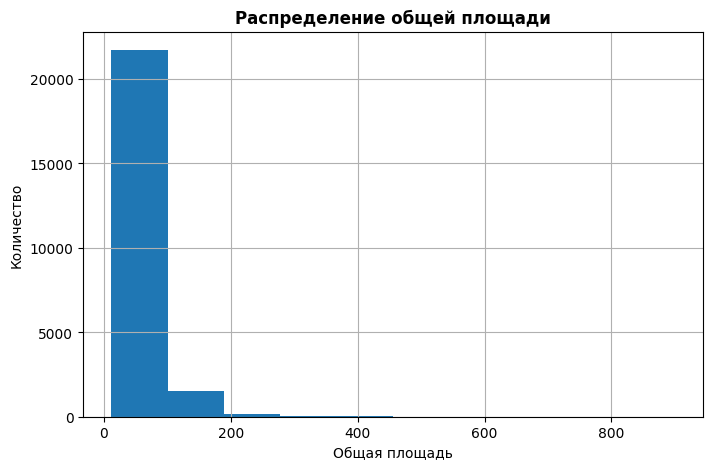

In [65]:
# вывод гистограммы по значениям столбца
real_estate_df['total_area'].hist(figsize=(8, 5))
plt.title('Распределение общей площади', weight='bold')
plt.xlabel('Общая площадь')
plt.ylabel('Количество')

In [66]:
# вывод численного описания столбца датафрейма
real_estate_df['total_area'].describe().round(2)

count    23477.00
mean        60.27
std         35.50
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

На основании построенной гистограммы и выведенного численного описания\
можно сделать следующие наблюдения:
- основная масса значений столбца лежит в диапазоне от примерно 20 до 110 кв.метров;
- максимальное значение - 900 кв.метров;
- минимальное значение - 12 кв.метров;
- наблюдается значительная разница между медианой (52,0) и средним значением (60,26);
- распределение сильно скошено вправо, т.е. в нем есть несколько очень больших значений площади,\
  которые и создают правый «хвост».

Для дальнейшего анализа рекомендуется отсечь данные\
которые больше 99% площадей и меньше 1% площадей.

Тогда гистограмма будет выглядеть так:

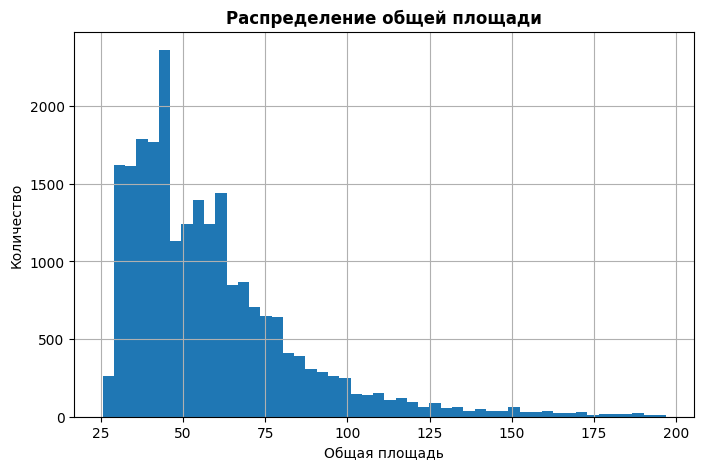

In [67]:
# объявление нижней и верхней границ выборки
total_area_low = real_estate_df['total_area'].quantile(0.01)
total_area_up = real_estate_df['total_area'].quantile(0.99)
# запись в новый датафрейм среза данных между объявленных границ
total_area = real_estate_df.query('total_area >= @total_area_low and total_area <= @total_area_up')
# настройки гистограммы
total_area['total_area'].hist(bins=50, figsize=(8, 5))
plt.title('Распределение общей площади', weight='bold')
plt.xlabel('Общая площадь')
plt.ylabel('Количество')
# вывод гистограммы
plt.show()

### ***ЖИЛАЯ ПЛОЩАДЬ*** `'living_area'`

Text(0, 0.5, 'Количество')

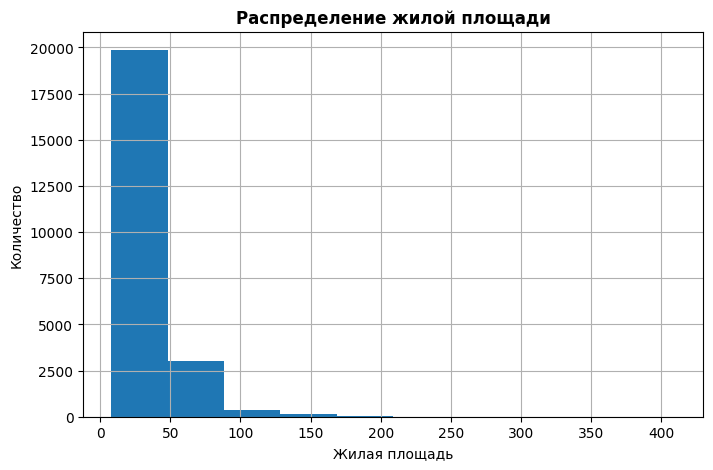

In [68]:
# вывод гистограммы по значениям столбца
real_estate_df['living_area'].hist(figsize=(8, 5))
plt.title('Распределение жилой площади', weight='bold')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество')

In [69]:
# вывод численного описания столбца датафрейма
real_estate_df['living_area'].describe().round(2)

count    23477.00
mean        34.58
std         22.27
min          8.00
25%         18.60
50%         30.00
75%         43.00
max        409.70
Name: living_area, dtype: float64

На основании построенной гистограммы и выведенного численного описания\
можно сделать следующие наблюдения:
- основная масса значений столбца лежит в диапазоне от примерно 17 до 45 кв.метров;
- максимальное значение - 409.7 кв.метров;
- минимальное значение - 8 кв.метров;
- распределение сильно скошено вправо, т.е. в нем есть несколько очень больших значений площади,\
  которые и создают правый «хвост».

Для дальнейшего анализа рекомендуется отсечь данные\
которые больше 99% площадей и меньше 1% площадей.

Тогда гистограмма будет выглядеть так:

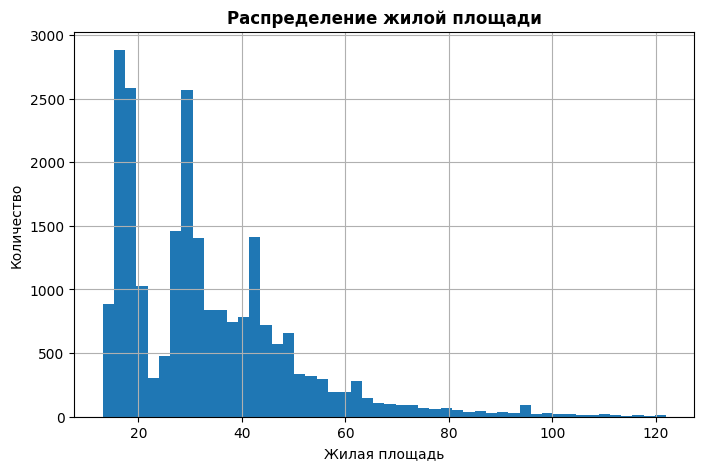

In [70]:
# объявление нижней и верхней границ выборки
living_area_low = real_estate_df['living_area'].quantile(0.01)
living_area_up = real_estate_df['living_area'].quantile(0.99)
# запись в новый датафрейм среза данных между объявленных границ
living_area = real_estate_df.query('living_area >= @living_area_low and living_area <= @living_area_up')
# настройки гистограммы
living_area['living_area'].hist(bins=50, figsize=(8, 5))
plt.title('Распределение жилой площади', weight='bold')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество')
# вывод гистограммы
plt.show()

### ***ПЛОЩАДЬ КУХНИ*** `'kitchen_area'`

Text(0, 0.5, 'Количество')

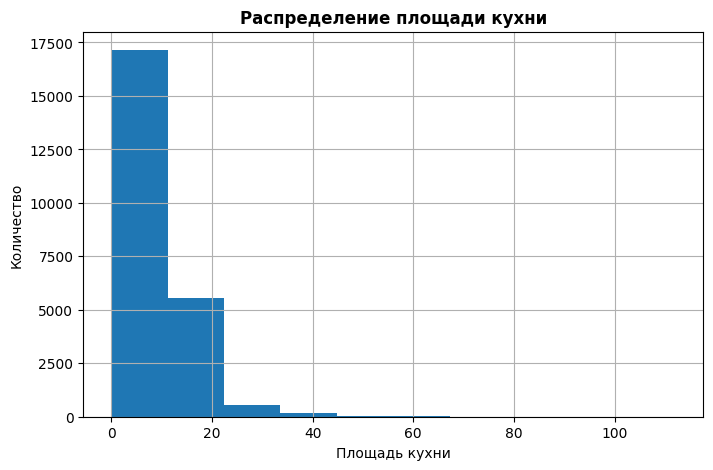

In [71]:
# вывод гистограммы по значениям столбца
real_estate_df['kitchen_area'].hist(figsize=(8, 5))
plt.title('Распределение площади кухни', weight='bold')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество')

In [72]:
# вывод численного описания столбца датафрейма
real_estate_df['kitchen_area'].describe().round(2)

count    23477.00
mean        10.37
std          5.77
min          0.00
25%          7.10
50%          9.00
75%         11.60
max        112.00
Name: kitchen_area, dtype: float64

На основании построенной гистограммы и выведенного численного описания\
можно сделать следующие наблюдения:
- основная масса значений столбца лежит в диапазоне от 0 до 22 кв.метров;
- максимальное значение - 112 кв.метров;
- минимальное значение - 0 кв.метров;
- наблюдается значительное стандартное отклонение - 5,76;
- распределение сильно скошено вправо, т.е. в нем есть несколько очень больших значений площади,\
  которые и создают правый «хвост».

Для дальнейшего анализа рекомендуется отсечь данные\
которые больше 99% площадей и меньше 1% площадей.

Тогда гистограмма будет выглядеть так:

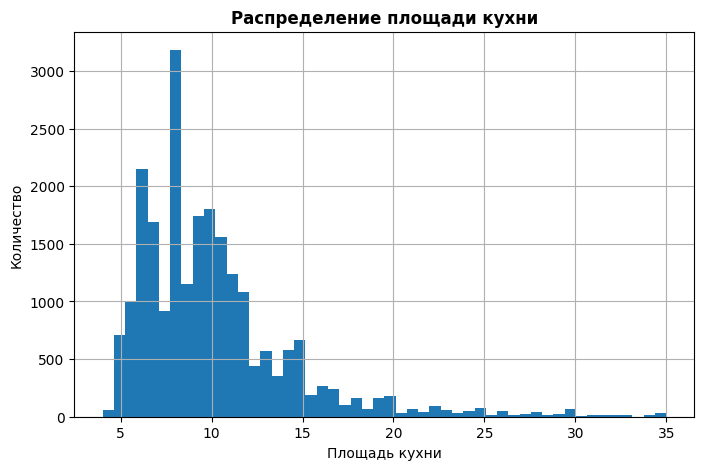

In [73]:
# объявление нижней и верхней границ выборки
kitchen_area_low = real_estate_df['kitchen_area'].quantile(0.01)
kitchen_area_up = real_estate_df['kitchen_area'].quantile(0.99)
# запись в новый датафрейм среза данных между объявленных границ
kitchen_area = real_estate_df.query('kitchen_area >= @kitchen_area_low and kitchen_area <= @kitchen_area_up')
# настройки гистограммы
kitchen_area['kitchen_area'].hist(bins=50, figsize=(8, 5))
plt.title('Распределение площади кухни', weight='bold')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество')
# вывод гистограммы
plt.show()

### ***ЦЕНА ОБЪЕКТА*** `'last_price'`

Text(0, 0.5, 'Количество')

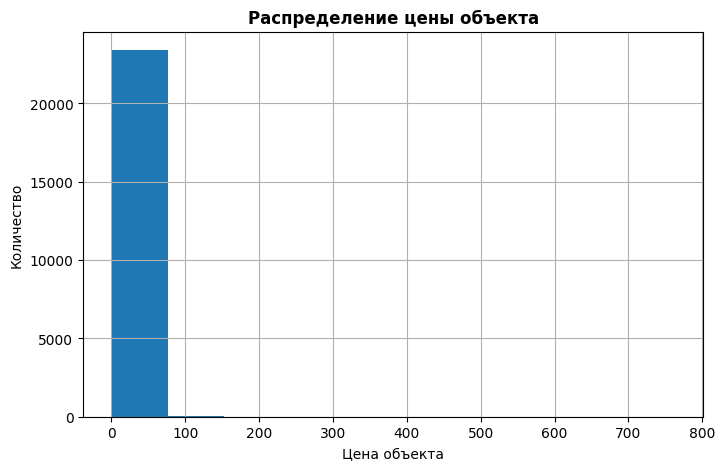

In [74]:
# вывод гистограммы по значениям столбца
real_estate_df['last_price'].hist(figsize=(8, 5))
plt.title('Распределение цены объекта', weight='bold')
plt.xlabel('Цена объекта')
plt.ylabel('Количество')

In [75]:
# вывод численного описания столбца датафрейма
real_estate_df['last_price'].describe().round(2)

count    23477.00
mean         6.52
std         10.87
min          0.01
25%          3.40
50%          4.63
75%          6.75
max        763.00
Name: last_price, dtype: float64

На основании построенной гистограммы и выведенного численного описания\
можно сделать следующие наблюдения:
- практически все значения столбца лежат в диапазоне от 2 до 65 млн рублей;
- максимальное значение - 763 млн рублей;
- минимальное значение - 0,01 млн рублей;
- наблюдается значительное стандартное отклонение - 10,87;
- распределение сильно скошено вправо, т.е. в нем есть несколько очень больших значений цены,\
  которые и создают правый «хвост».

Для дальнейшего анализа рекомендуется отсечь данные\
которые больше 99% значений цены и меньше 1% данных.

Тогда гистограмма будет выглядеть так:

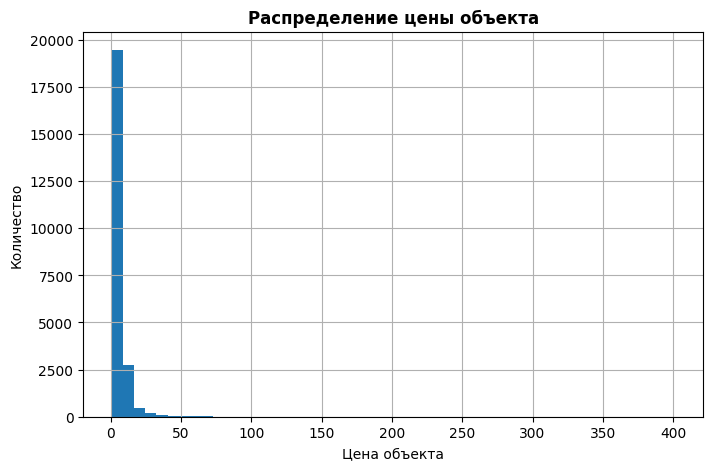

In [76]:
# объявление нижней и верхней границ выборки
last_price_low = real_estate_df['last_price'].quantile(0.01)
last_price_up = real_estate_df['last_price'].quantile(0.99)
# запись в новый датафрейм среза данных между объявленных границ
last_price = real_estate_df.query('last_price >= @last_price_low and last_price <= @last_price_up')
# настройки гистограммы
kitchen_area['last_price'].hist(bins=50, figsize=(8, 5))
plt.title('Распределение цены объекта', weight='bold')
plt.xlabel('Цена объекта')
plt.ylabel('Количество')
# вывод гистограммы
plt.show()

### ***КОЛИЧЕСТВО КОМНАТ*** `'rooms'`

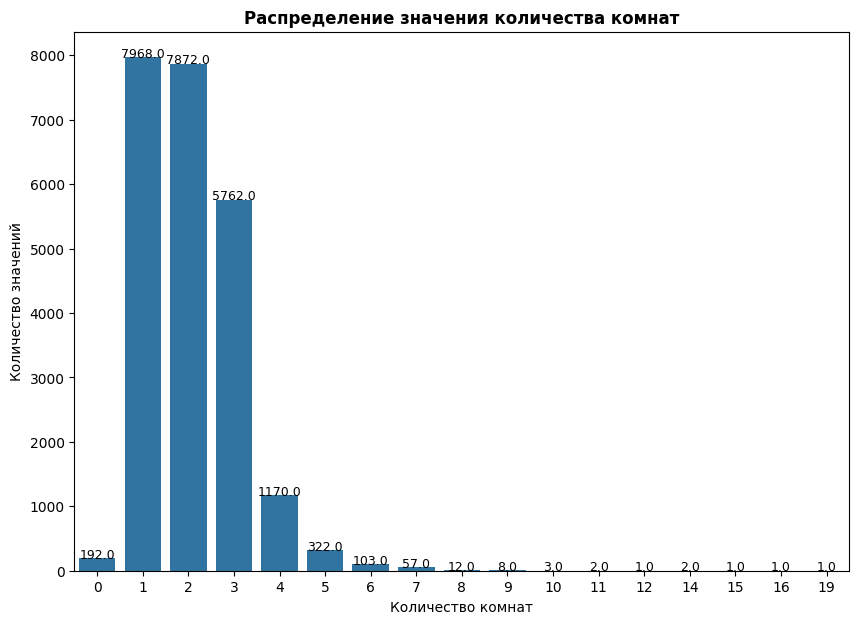

In [77]:
# вывод графика по значениям столбца
countplt, ax = plt.subplots(figsize = (10,7))
sns.countplot(x = 'rooms', data = real_estate_df)
plt.title('Распределение значения количества комнат', weight='bold')
plt.xlabel('Количество комнат')
plt.ylabel('Количество значений')
for rect in ax.patches:
    (
        ax.text(
            rect.get_x() + rect.get_width()/2,
            rect.get_height(),
            rect.get_height(),
            horizontalalignment='center',
            fontsize = 9
        )
    )

In [78]:
# вывод численного описания столбца датафрейма
real_estate_df['rooms'].describe().round(2)

count    23477.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

На основании построенного графика и выведенного численного описания\
можно сделать следующие наблюдения:
- практически все значения столбца лежат в диапазоне от 1 до 2 комнат;
- максимальное значение - 19 комнат;
- минимальное значение - 0 комнат;
- распределение сильно скошено вправо, т.е. в нем есть несколько очень больших значений,\
  которые и создают правый «хвост».

Для дальнейшего анализа рекомендуется отсечь данные\
которые больше 99% значений цены и меньше 1% данных.

Тогда график будет выглядеть так:

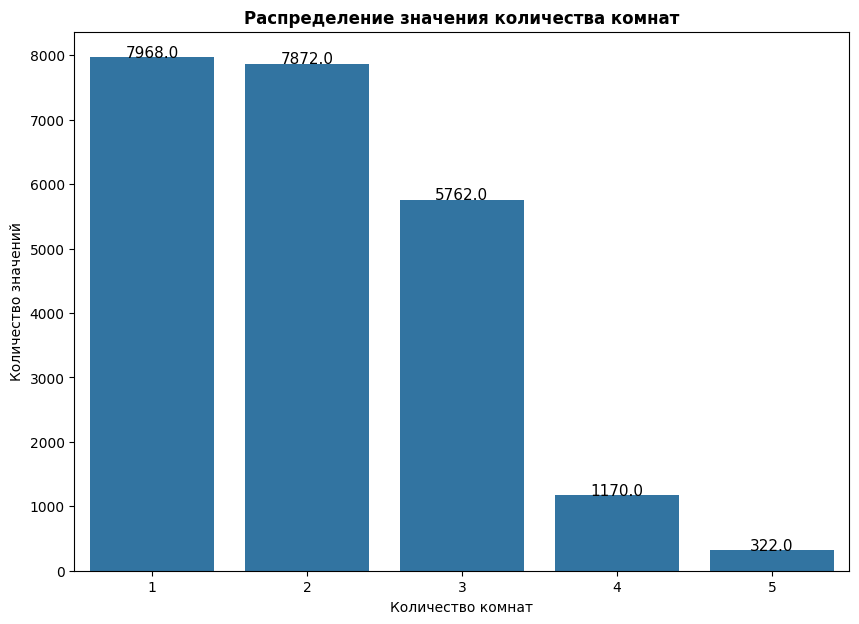

In [79]:
# объявление нижней и верхней границ выборки
rooms_low = real_estate_df['rooms'].quantile(0.01)
rooms_up = real_estate_df['rooms'].quantile(0.99)
# запись в новый датафрейм среза данных между объявленных границ
rooms = real_estate_df.query('rooms >= @rooms_low and rooms <= @rooms_up')
# вывод графика
countplt, ax = plt.subplots(figsize = (10,7))
sns.countplot(x = 'rooms', data = rooms)
plt.title('Распределение значения количества комнат', weight='bold')
plt.xlabel('Количество комнат')
plt.ylabel('Количество значений')
for rect in ax.patches:
    (
        ax.text(
            rect.get_x() + rect.get_width()/2,
            rect.get_height() + 0.75,
            rect.get_height(),
            horizontalalignment='center',
            fontsize = 11
        )
    )

### ***ВЫСОТА ПОТОЛКОВ*** `'ceiling_height'`

Text(0, 0.5, 'Количество')

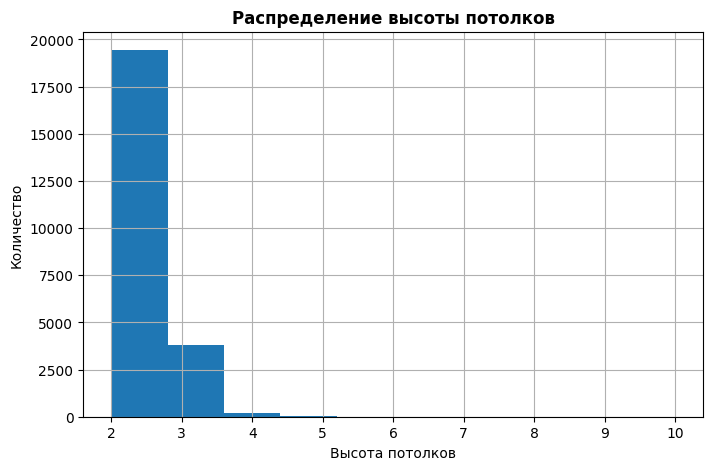

In [80]:
# вывод гистограммы по значениям столбца
real_estate_df['ceiling_height'].hist(figsize=(8, 5))
plt.title('Распределение высоты потолков', weight='bold')
plt.xlabel('Высота потолков')
plt.ylabel('Количество')

In [81]:
# вывод численного описания столбца датафрейма
real_estate_df['ceiling_height'].describe().round(2)

count    23477.00
mean         2.70
std          0.24
min          2.00
25%          2.55
50%          2.70
75%          2.70
max         10.00
Name: ceiling_height, dtype: float64

На основании построенной гистограммы и выведенного численного описания\
можно сделать следующие наблюдения:
- практически все значения столбца лежат в диапазоне от 2 до 3,7 метров;
- максимальное значение - 10 метров;
- минимальное значение - 2 метрa;
- распределение сильно скошено вправо, т.е. в нем есть несколько очень больших значений,\
  которые и создают правый «хвост».

Для дальнейшего анализа рекомендуется отсечь данные\
которые больше 99% значений высоты потолков и меньше 1% данных.

Тогда гистограмма будет выглядеть так:

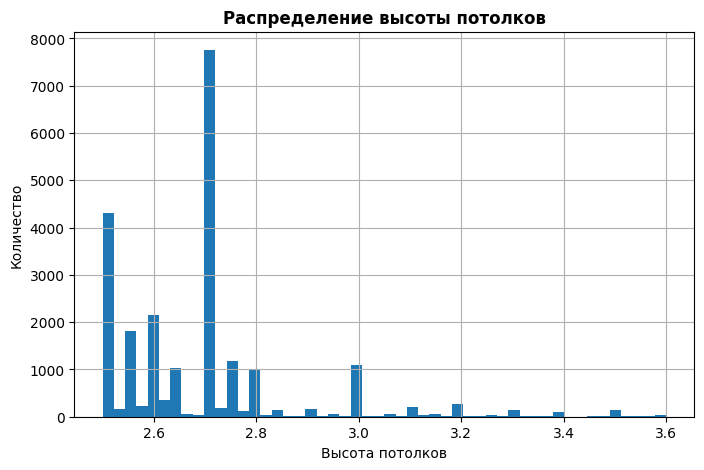

In [82]:
# объявление нижней и верхней границ выборки
lower_bound = real_estate_df['ceiling_height'].quantile(0.01)
upper_bound = real_estate_df['ceiling_height'].quantile(0.99)
# запись в новый датафрейм среза данных между объявленных границ
ceiling_height = real_estate_df.query('ceiling_height >= @lower_bound and ceiling_height <= @upper_bound')
# настройки гистограммы
ceiling_height['ceiling_height'].hist(bins=50, figsize=(8, 5))
plt.title('Распределение высоты потолков', weight='bold')
plt.xlabel('Высота потолков')
plt.ylabel('Количество')
# вывод гистограммы
plt.show()

### ***ЭТАЖ КВАРТИРЫ*** `'floor'`

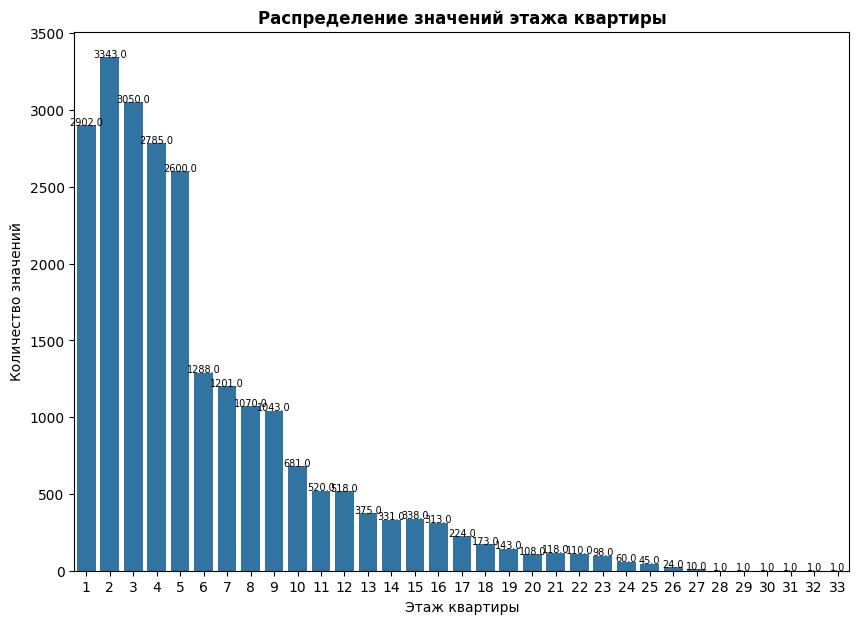

In [83]:
# вывод графика по значениям столбца
countplt, ax = plt.subplots(figsize = (10,7))
sns.countplot(x = 'floor', data = real_estate_df)
plt.title('Распределение значений этажа квартиры', weight='bold')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество значений')
for rect in ax.patches:
    (
        ax.text(
            rect.get_x() + rect.get_width()/2,
            rect.get_height() + 0.75,
            rect.get_height(),
            horizontalalignment='center',
            fontsize = 7
        )
    )

In [84]:
# вывод численного описания столбца датафрейма
real_estate_df['floor'].describe().round(2)

count    23477.00
mean         5.87
std          4.87
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         33.00
Name: floor, dtype: float64

На основании построенного графика и выведенного численного описания\
можно сделать следующие наблюдения:
- основная масса значений столбца лежит в диапазоне от 1-го до 5-го этажа;
- максимальное значение - 30-й этаж;
- минимальное значение - 1 этаж;
- распределение сильно скошено вправо, т.е. в нем есть несколько очень больших значений,\
  которые и создают правый «хвост».

Для дальнейшего анализа рекомендуется отсечь данные\
которые больше 99% значений и меньше 1% данных.

Тогда график будет выглядеть так:

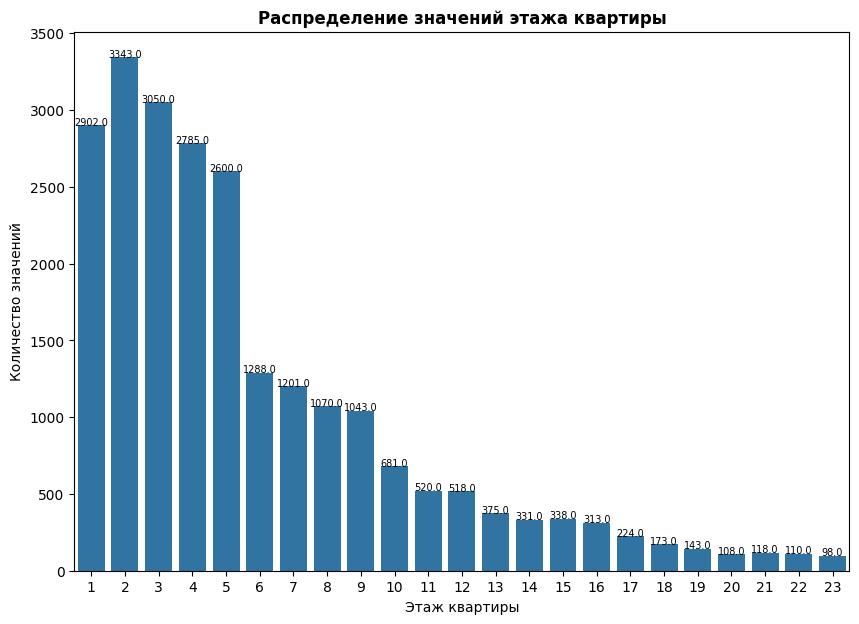

In [85]:
# объявление нижней и верхней границ выборки
lower_bound = real_estate_df['floor'].quantile(0.01)
upper_bound = real_estate_df['floor'].quantile(0.99)
# запись в новый датафрейм среза данных между объявленных границ
floor = real_estate_df.query('floor >= @lower_bound and floor <= @upper_bound')
# вывод графика
countplt, ax = plt.subplots(figsize = (10,7))
sns.countplot(x = 'floor', data = floor)
plt.title('Распределение значений этажа квартиры', weight='bold')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество значений')
for rect in ax.patches:
    (
        ax.text(
            rect.get_x() + rect.get_width()/2,
            rect.get_height() + 0.75,
            rect.get_height(),
            horizontalalignment='center',
            fontsize = 7
        )
    )

### ***ТИП ЭТАЖА КВАРТИРЫ*** `'type_floor'`

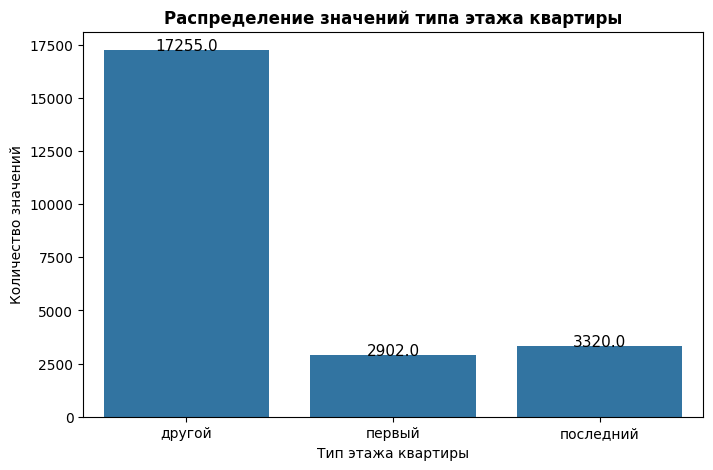

In [86]:
# вывод графика по значениям столбца
countplt, ax = plt.subplots(figsize = (8, 5))
sns.countplot(x = 'type_floor', data = real_estate_df)
plt.title('Распределение значений типа этажа квартиры', weight='bold')
plt.xlabel('Тип этажа квартиры')
plt.ylabel('Количество значений')
for rect in ax.patches:
    (
        ax.text(
            rect.get_x() + rect.get_width()/2,
            rect.get_height() + 0.75,
            rect.get_height(),
            horizontalalignment='center',
            fontsize = 11
        )
    )

In [87]:
# вывод численного описания столбца датафрейма
real_estate_df['type_floor'].describe()

count      23477
unique         3
top       другой
freq       17255
Name: type_floor, dtype: object

На основании построенного графика и выведенного численного описания\
можно сделать следующие наблюдения:
- основная масса значений столбца - "другой";
- квартир с типами этажа "первый" и "последний" примерно одинаковое количество.

### ***ОБЩЕЕ КОЛИЧЕСТВО ЭТАЖЕЙ В ДОМЕ*** `'floors_total'`

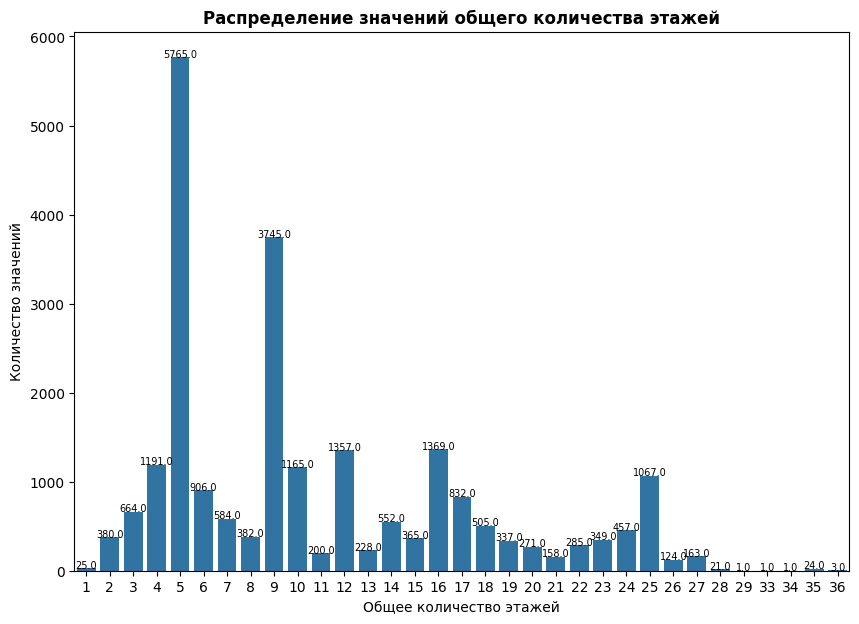

In [88]:
# вывод графика по значениям столбца
countplt, ax = plt.subplots(figsize = (10,7))
sns.countplot(x = 'floors_total', data = real_estate_df)
plt.title('Распределение значений общего количества этажей', weight='bold')
plt.xlabel('Общее количество этажей')
plt.ylabel('Количество значений')
for rect in ax.patches:
    (
        ax.text(
            rect.get_x() + rect.get_width()/2,
            rect.get_height() + 0.75,
            rect.get_height(),
            horizontalalignment='center',
            fontsize = 7
        )
    )

In [89]:
# вывод численного описания столбца датафрейма
real_estate_df['floors_total'].describe()

count      23477.0
mean     10.666951
std       6.577988
min            1.0
25%            5.0
50%            9.0
75%           16.0
max           36.0
Name: floors_total, dtype: Float64

На основании построенного графика и выведенного численного описания\
можно сделать следующие наблюдения:
- основная масса значений столбца приходится на 5, 9, 12 и 16 этажей;
- максимальное значение - 36 этажей;
- минимальное значение - 1 этаж;
- распределение скошено вправо, т.е. в нем есть несколько больших значений,\
  которые и создают правый «хвост».

Для дальнейшего анализа рекомендуется отсечь данные\
которые больше 99% значений и меньше 1% данных.

Тогда график будет выглядеть так:

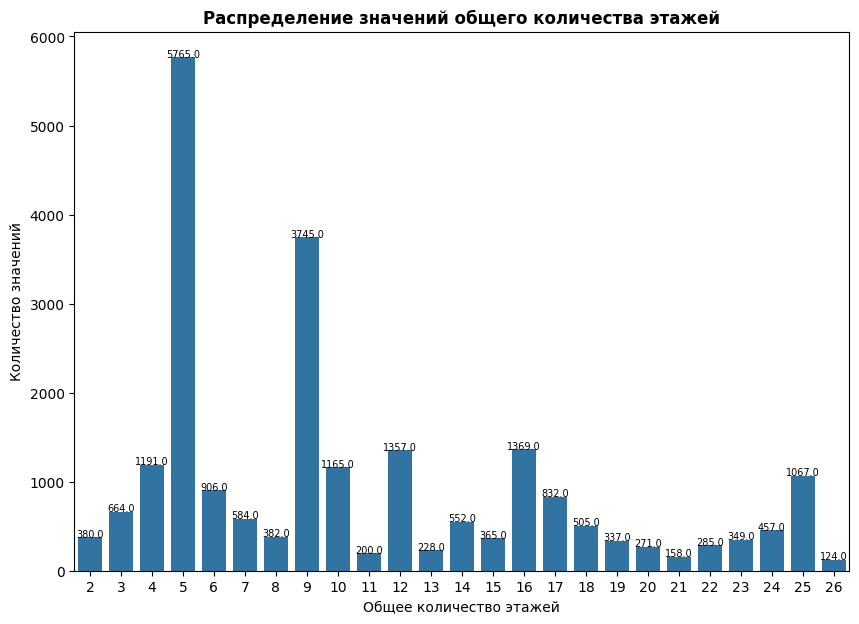

In [90]:
# объявление нижней и верхней границ выборки
lower_bound = real_estate_df['floors_total'].quantile(0.01)
upper_bound = real_estate_df['floors_total'].quantile(0.99)
# запись в новый датафрейм среза данных между объявленных границ
floors_total = real_estate_df.query('floors_total >= @lower_bound and floors_total <= @upper_bound')
# вывод графика
countplt, ax = plt.subplots(figsize = (10,7))
sns.countplot(x = 'floors_total', data = floors_total)
plt.title('Распределение значений общего количества этажей', weight='bold')
plt.xlabel('Общее количество этажей')
plt.ylabel('Количество значений')
for rect in ax.patches:
    (
        ax.text(
            rect.get_x() + rect.get_width()/2,
            rect.get_height() + 0.75,
            rect.get_height(),
            horizontalalignment='center',
            fontsize = 7
        )
    )

### ***РАССТОЯНИЕ ДО ЦЕНТРА ГОРОДА В МЕТРАХ*** `'city_centers_nearest'`

Text(0, 0.5, 'Количество значений')

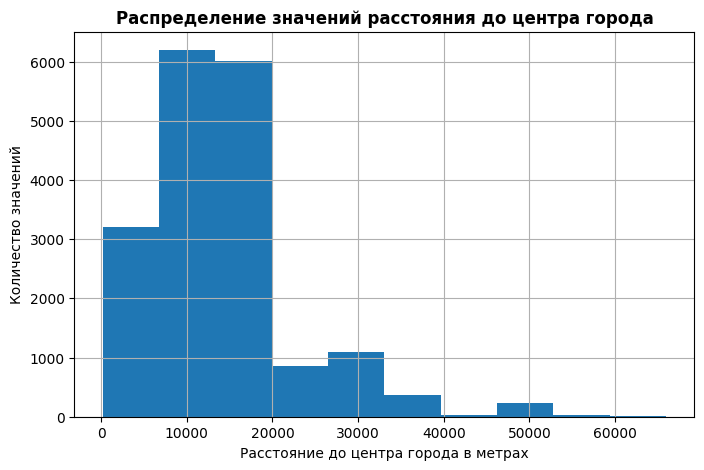

In [91]:
# вывод гистограммы по значениям столбца
real_estate_df['city_centers_nearest'].hist(figsize=(8, 5))
plt.title('Распределение значений расстояния до центра города', weight='bold')
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Количество значений')

In [92]:
# вывод численного описания столбца датафрейма
real_estate_df['city_centers_nearest'].describe().round(2)

count    18042.0
mean     14191.9
std      8613.34
min        181.0
25%       9238.0
50%      13098.5
75%      16285.0
max      65968.0
Name: city_centers_nearest, dtype: Float64

На основании построенной гистограммы и выведенного численного описания\
можно сделать следующие наблюдения:
- большая часть значений столбца лежит в диапазоне от 3 до 20 тыс.метров;
- максимальное значение - 65968 метров;
- минимальное значение - 181 метр;
- распределение сильно скошено вправо, т.е. в нем есть несколько очень больших значений,\
  которые и создают правый «хвост».

Для дальнейшего анализа рекомендуется отсечь данные\
которые больше 99% значений и меньше 1% данных.

Тогда гистограмма будет выглядеть так:

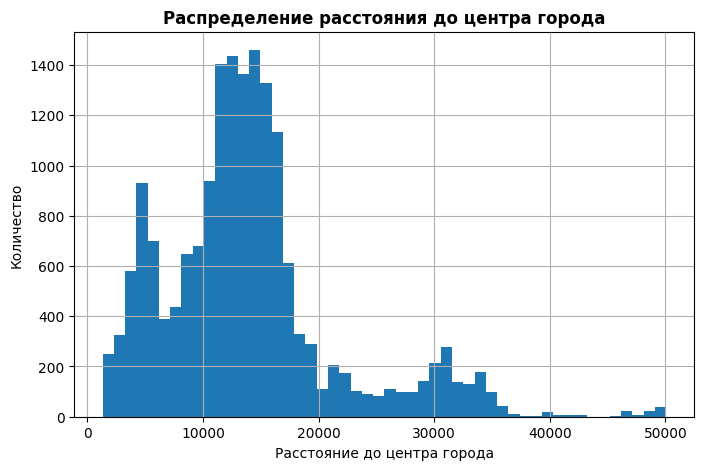

In [93]:
# объявление нижней и верхней границ выборки
lower_bound = real_estate_df['city_centers_nearest'].quantile(0.01)
upper_bound = real_estate_df['city_centers_nearest'].quantile(0.99)
# запись в новый датафрейм среза данных между объявленных границ
city_сenters_nearest = real_estate_df.query('city_centers_nearest >= @lower_bound and city_centers_nearest <= @upper_bound')
# настройки гистограммы
city_сenters_nearest['city_centers_nearest'].hist(bins=50, figsize=(8, 5))
plt.title('Распределение расстояния до центра города', weight='bold')
plt.xlabel('Расстояние до центра города')
plt.ylabel('Количество')
# вывод гистограммы
plt.show()

### ***РАССТОЯНИЕ ДО БЛИЖАЙШЕГО АЭРОПОРТА*** `'airports_nearest'`

Text(0, 0.5, 'Количество')

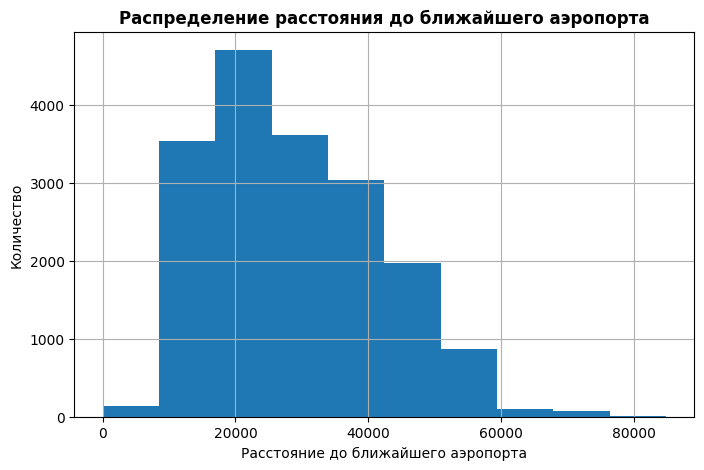

In [94]:
# вывод гистограммы по значениям столбца
real_estate_df['airports_nearest'].hist(figsize=(8, 5))
plt.title('Распределение расстояния до ближайшего аэропорта', weight='bold')
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.ylabel('Количество')

In [95]:
# вывод численного описания столбца датафрейма
real_estate_df['airports_nearest'].describe().round(2)

count     18019.0
mean     28795.39
std      12631.48
min           0.0
25%       18557.0
50%       26755.0
75%       37274.0
max       84869.0
Name: airports_nearest, dtype: Float64

На основании построенной гистограммы и выведенного численного описания\
можно сделать следующие наблюдения:
- для указанных в датафрейме значений (их всего 11504) большая часть\
  лежит в диапазоне от 9 до 59 тыс.метров;
- максимальное значение - 84869 метров;
- минимальное значение - 0 метров;
- распределение немного скошено вправо, т.е. в нем есть несколько больших значений,\
  которые и создают правый «хвост».

Для дальнейшего анализа рекомендуется отсечь данные\
которые больше 99% значений и меньше 1% данных.

Тогда гистограмма будет выглядеть так:

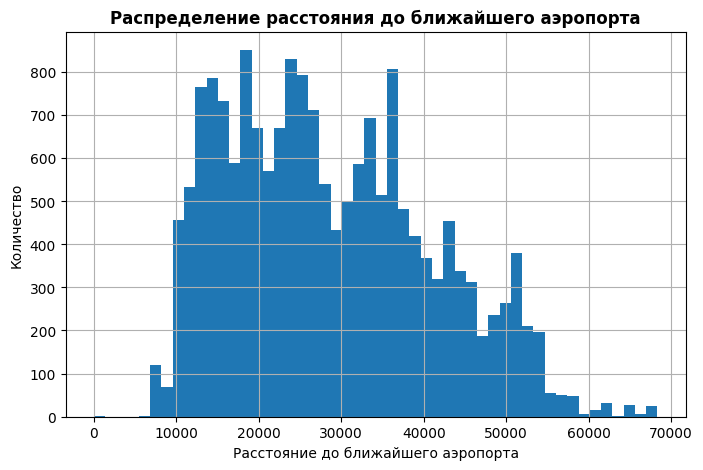

In [96]:
# объявление нижней и верхней границ выборки
lower_bound = real_estate_df['airports_nearest'].quantile(0.01)
upper_bound = real_estate_df['airports_nearest'].quantile(0.99)
# запись в новый датафрейм среза данных между объявленных границ
airports_nearest = real_estate_df.query('airports_nearest >= @lower_bound and airports_nearest <= @upper_bound')
# настройки гистограммы
city_сenters_nearest['airports_nearest'].hist(bins=50, figsize=(8, 5))
plt.title('Распределение расстояния до ближайшего аэропорта', weight='bold')
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.ylabel('Количество')
# вывод гистограммы
plt.show()

### ***РАССТОЯНИЕ ДО БЛИЖАЙШЕГО ПАРКА*** `'parks_nearest'`

Text(0, 0.5, 'Количество')

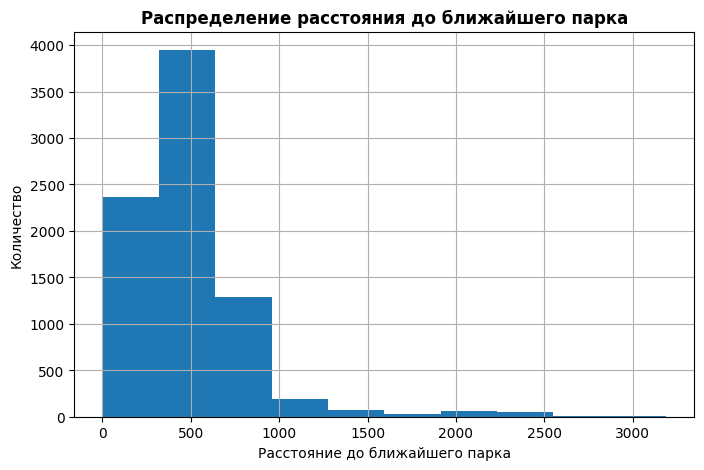

In [97]:
# вывод гистограммы по значениям столбца
real_estate_df['parks_nearest'].hist(figsize=(8, 5))
plt.title('Распределение расстояния до ближайшего парка', weight='bold')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество')

In [98]:
# вывод численного описания столбца датафрейма
real_estate_df['parks_nearest'].describe().round(2)

count    8021.0
mean     490.53
std      341.71
min         1.0
25%       288.0
50%       455.0
75%       612.0
max      3190.0
Name: parks_nearest, dtype: Float64

На основании построенной гистограммы и выведенного численного описания\
можно сделать следующие наблюдения:
- для указанных в датафрейме значений (их всего 5277) большая часть\
  лежит в диапазоне от 3 до 900 метров;
- максимальное значение - 3190 метров;
- минимальное значение - 3 метра;
- стандартное отклонение велико - 320,27 метров;
- распределение сильно скошено вправо, т.е. в нем есть несколько очень больших значений,\
  которые и создают правый «хвост».

Для дальнейшего анализа рекомендуется отсечь данные\
которые больше 99% значений и меньше 1% данных.

Тогда гистограмма будет выглядеть так:

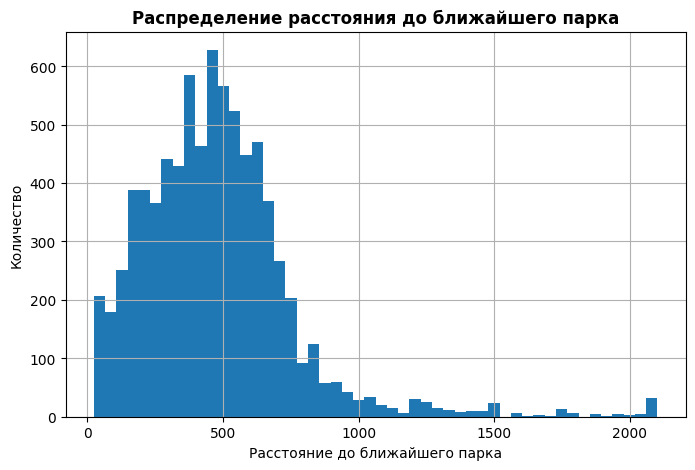

In [99]:
# объявление нижней и верхней границ выборки
lower_bound = real_estate_df['parks_nearest'].quantile(0.01)
upper_bound = real_estate_df['parks_nearest'].quantile(0.99)
# запись в новый датафрейм среза данных между объявленных границ
parks_nearest = real_estate_df.query('parks_nearest >= @lower_bound and parks_nearest <= @upper_bound')
# настройки гистограммы
parks_nearest['parks_nearest'].hist(bins=50, figsize=(8, 5))
plt.title('Распределение расстояния до ближайшего парка', weight='bold')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество')
# вывод гистограммы
plt.show()

### ***ДЕНЬ ПУБЛИКАЦИИ ОБЪЯВЛЕНИЯ*** `'weekday_number'`

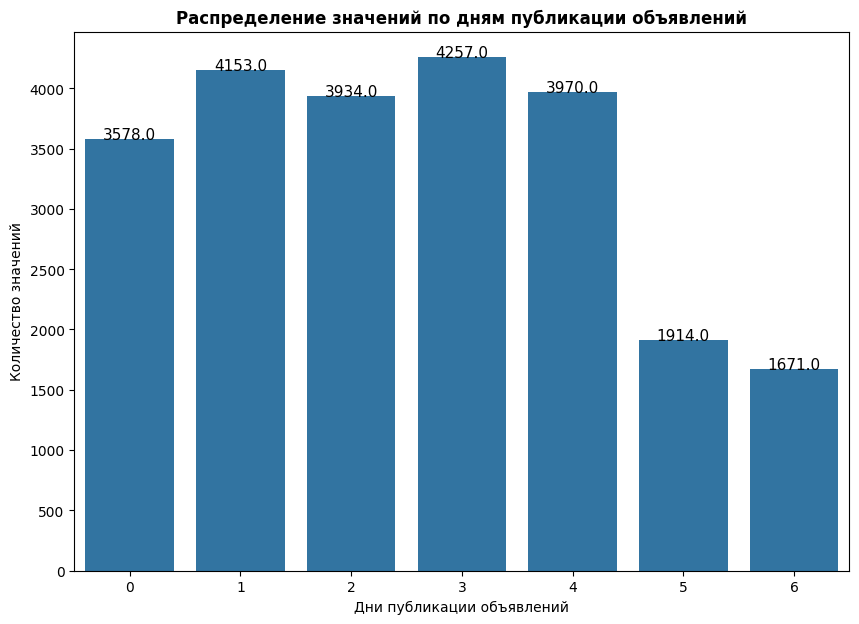

In [100]:
# вывод графика по значениям столбца
countplt, ax = plt.subplots(figsize = (10,7))
sns.countplot(x = 'weekday_number', data = real_estate_df)
plt.title('Распределение значений по дням публикации объявлений', weight='bold')
plt.xlabel('Дни публикации объявлений')
plt.ylabel('Количество значений')
for rect in ax.patches:
    (
        ax.text(
            rect.get_x() + rect.get_width()/2,
            rect.get_height() + 0.75,
            rect.get_height(),
            horizontalalignment='center',
            fontsize = 11
        )
    )

На основании построенного графика можно сделать следующие наблюдения:
- большая часть объявлений публикуется в будни.

### ***МЕСЯЦ ПУБЛИКАЦИИ ОБЪЯВЛЕНИЯ*** `'month'`

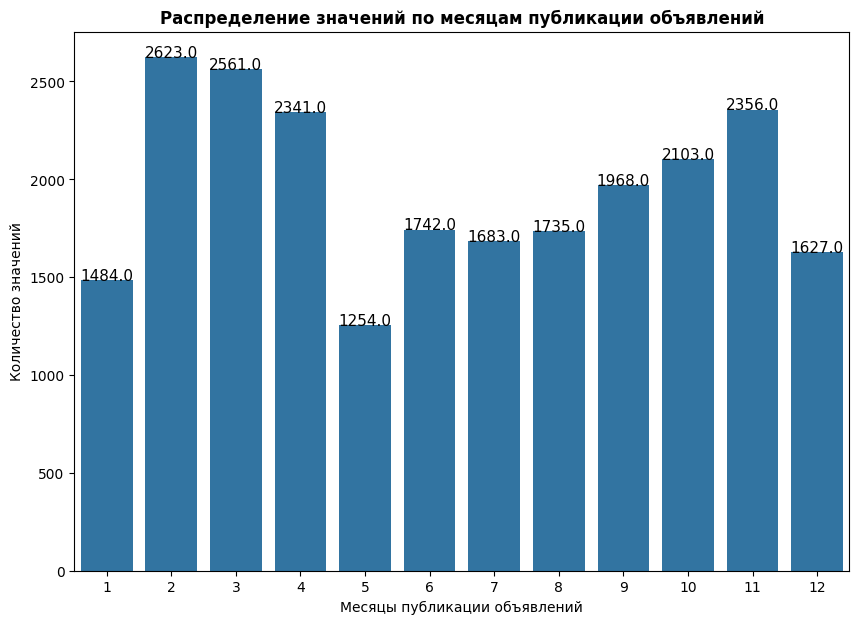

In [101]:
# вывод графика по значениям столбца
countplt, ax = plt.subplots(figsize = (10,7))
sns.countplot(x = 'month', data = real_estate_df)
plt.title('Распределение значений по месяцам публикации объявлений', weight='bold')
plt.xlabel('Месяцы публикации объявлений')
plt.ylabel('Количество значений')
for rect in ax.patches:
    (
        ax.text(
            rect.get_x() + rect.get_width()/2,
            rect.get_height() + 0.75,
            rect.get_height(),
            horizontalalignment='center',
            fontsize = 11
        )
    )

На основании построенного графика можно сделать следующие наблюдения:
- большая часть объявлений публикуется в феврале и марте;
- наименьшее количество объявлений публикуется в мае;
- после мая с июня по ноябрь количество публикуемых объявлений плавно увеличивается;
- в декабре и январе наблюдается провал в количестве публикаций объявлений.

## Подготовка датафрейма к анализу данных

На основании выводов из предыдущего изучения параметров объектов\
создадим очищенный от выбросов новый датафрейм для последующего анализа.

Для этого отсечем данные ниже порогового значения в 1% и выше порогового значения в 99%

In [102]:
# создание датафрейма
clean_df = real_estate_df.query(
    'total_area >= @total_area_low and total_area <= @total_area_up and '
    'living_area >= @living_area_low and living_area <= @living_area_up and '
    'kitchen_area >= @kitchen_area_low and kitchen_area <= @kitchen_area_up and '
    'last_price >= @last_price_low and last_price <= @last_price_up and '
    'rooms >= @rooms_low and rooms <= @rooms_up'
)
# вывод информации о датафрейме
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22091 entries, 0 to 23475
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22091 non-null  int64         
 1   last_price            22091 non-null  float64       
 2   total_area            22091 non-null  float64       
 3   first_day_exposition  22091 non-null  datetime64[ns]
 4   rooms                 22091 non-null  int64         
 5   ceiling_height        22091 non-null  float64       
 6   floors_total          22091 non-null  Int64         
 7   living_area           22091 non-null  float64       
 8   floor                 22091 non-null  int64         
 9   is_apartment          22091 non-null  bool          
 10  studio                22091 non-null  bool          
 11  open_plan             22091 non-null  bool          
 12  kitchen_area          22091 non-null  float64       
 13  balcony              

Выведем информацию о количестве удаленных данных.

In [103]:
print(f'Датафрейм для анализа данных содержит {clean_df.shape[0]} строк.')
print(f'Первоначальный датафрейм содержал {rows_before} строк.')
print(f'Удалено {rows_before-clean_df.shape[0]} строки.')
print(f'Это примерно {round(100-(clean_df.shape[0]/rows_before*100), 2)}% от первоначального размера датафрейма.')

Датафрейм для анализа данных содержит 22091 строк.
Первоначальный датафрейм содержал 23699 строк.
Удалено 1608 строки.
Это примерно 6.79% от первоначального размера датафрейма.


***

**Вывод:**

1. Были изучены параметры объектов с помощью гистограмм и численных методов.
2. Был подготовлен новый датафрейм с очищенными от выбросов данными для дальнейшего анализа.

## Изучение времени продажи объектов

Построим гистограмму для дней размещения объявлений.

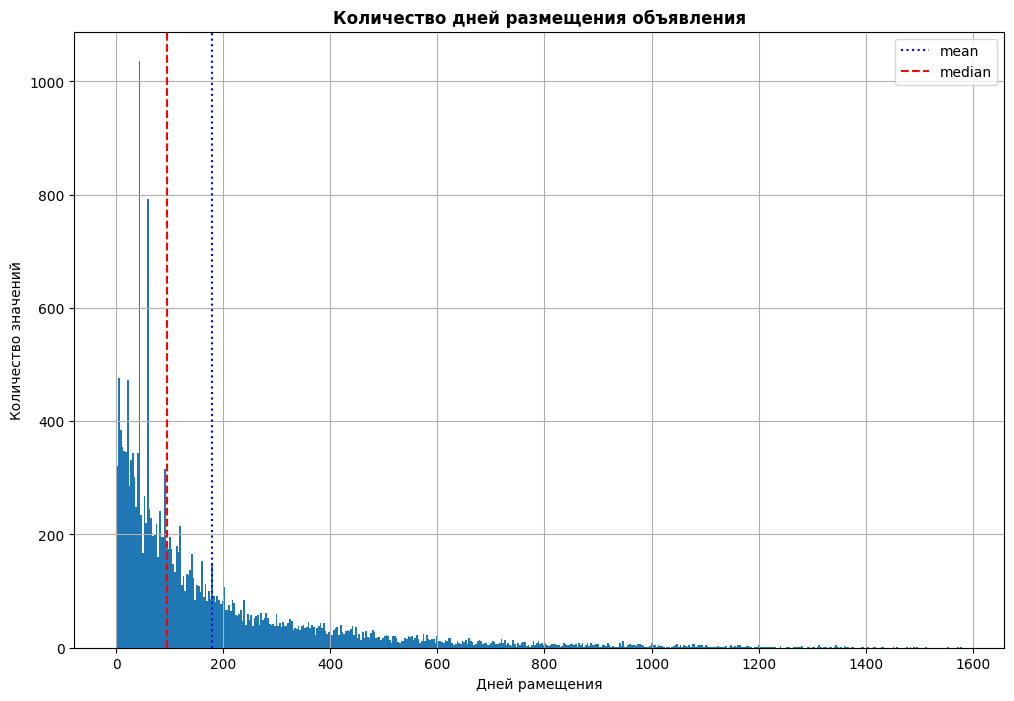

In [104]:
# объявление переменных для среднего и медианы
median_value = clean_df['days_exposition'].median()
mean_value = clean_df['days_exposition'].mean()

# построение гистограммы
clean_df['days_exposition'].hist(bins = 500, figsize=(12, 8))

# Установка заголовка графика
plt.title('Количество дней размещения объявления', weight='bold')
# Добавление подписи для оси Y
plt.ylabel('Количество значений')
# Добавление подписи для оси X
plt.xlabel('Дней рамещения')

# Добавление вертикальной линии для среднего значения с синим цветом и точечной линией
plt.axvline(x=mean_value, label='mean', color='b', linestyle=':')
# Добавление вертикальной линии для медианного значения с красным цветом и пунктирной линией
plt.axvline(x=median_value, label='median', color='r', linestyle='--')
plt.legend()

Распределение значений на гистограмме сильно скошено вправо.\
Большая часть значений приходится на диапазон от 0 до 100.

Поэтому отрисуем гистограмму для этого диапазона.

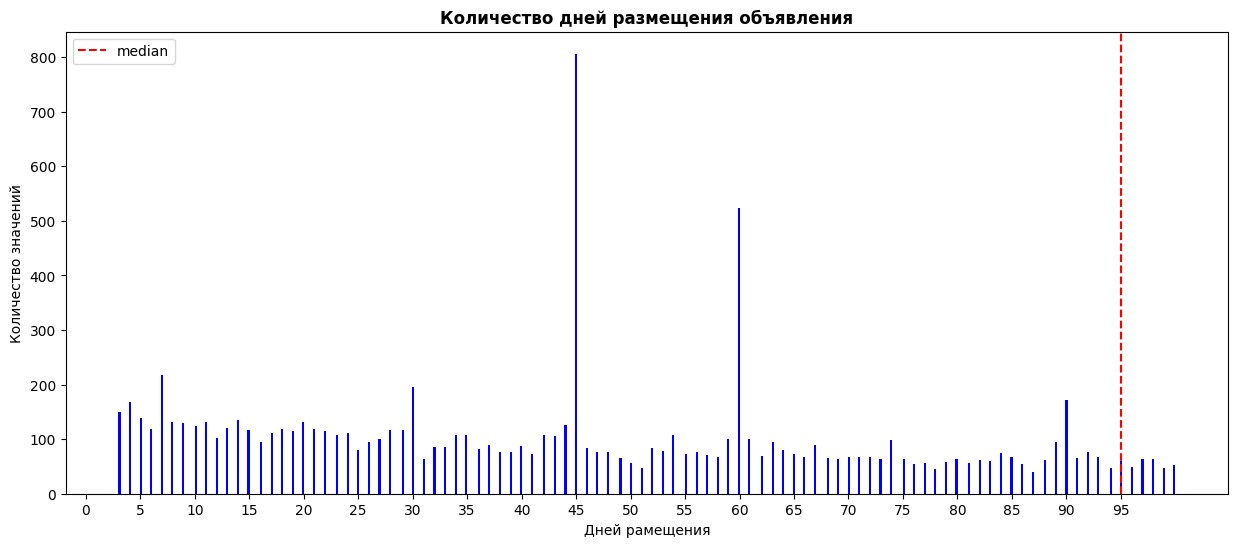

In [105]:
# построение гистограммы
clean_df['days_exposition'].hist(bins=500, range=(3, 100), figsize=(15, 6), color='blue', grid=False)

# Установка заголовка графика
plt.title('Количество дней размещения объявления', weight='bold')
# Добавление подписи для оси Y
plt.ylabel('Количество значений')
# Добавление подписи для оси X
plt.xlabel('Дней рамещения')
# Настройка меток по оси X с шагом 5 от 0 до 100
plt.xticks(np.arange(0, 100, 5))
# Добавление вертикальной линии для медианного значения с синим цветом и точечной линией
plt.axvline(x=median_value, label='median', color='r', linestyle='--')
#plt.bar_label(bars)
plt.legend()


На гистограмме присутствуют чёткие пики значений.\
Приведем их в порядке уменьшения их значений:
- 45 дней
- 60 дней
- 7 дней
- 30 дней
- 90 дней

Выведем количество наблюдений для этих значений столбца `'days_exposition'`

In [106]:
# вывод 5-ти самых частых значений и их количества
clean_df['days_exposition'].value_counts().head()

days_exposition
45    806
60    524
7     218
30    196
90    172
Name: count, dtype: Int64

Выведем численное описание столбца `'days_exposition'`

In [107]:
# вывод численного описания столбца
clean_df['days_exposition'].describe().round(2)

count    19204.0
mean      179.44
std       217.98
min          1.0
25%         45.0
50%         95.0
75%        229.0
max       1580.0
Name: days_exposition, dtype: Float64

Найдем границы самых долгих и самых быстрых продаж.\
Обозначим значения границ в 10% от количества значений датафрейма.

In [108]:
# нахождение границ
print(real_estate_df['days_exposition'].quantile(0.1))
print(real_estate_df['days_exposition'].quantile(0.9))

17
460


*--------*

**Вывод:**

1. Обычно продажа занимает 95 дней - медианное значение `'days_exposition'`
2. Максимальное значение столбца - 1580 дней.
3. Минимальное значение столбца - 1 день.
4. Среднее значение по столбцу - 179,44 дня.
5. Среднее значительно больше медианы, так как в столбце есть несколько очень больших значений.
6. Наибольшее количество значений приходится на список:
   - 45 дней
   - 60 дней
   - 7 дней
   - 30 дней
   - 90 дней
7. Возможно, эта продолжительность размещения объявлений связана с модерацией, но не с продажей объекта.
8. Необычно долгими можно назвать продажи, доля которых в датафрейме менее 10%:
   - это продажи, занимающие более 460 дней.
9. Необычно быстрыми можно назвать продажи, доля которых в датафрейме менее 10%:
   - это продажи, занимающие менее 17 дней.

## Изучение влияния факторов на стоимость объекта

### Площади: общая, жилая, кухни - влияние на стоимость объекта

Выведем график для оценки влияния общей площади на стоимость объекта с помощью сводной таблицы

Text(0.5, 0, 'Общая площадь')

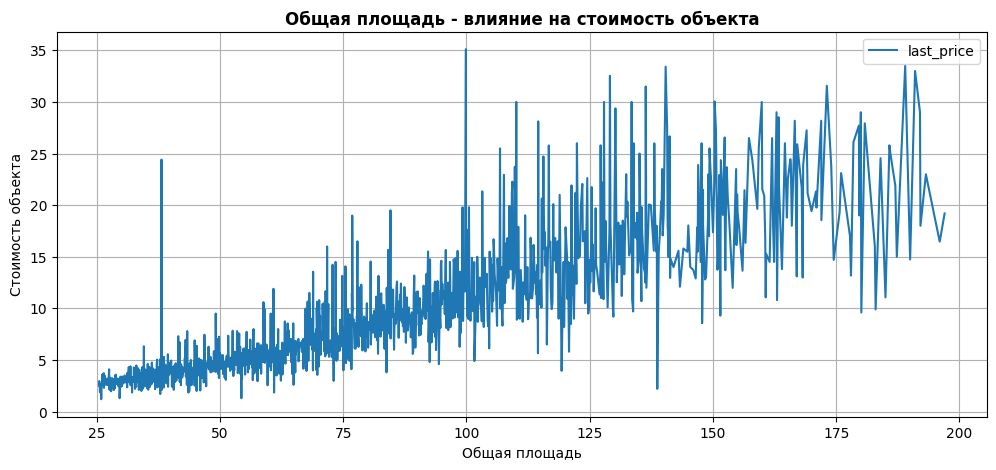

In [109]:
# вывод графика с pivot_table()
clean_df.pivot_table(index='total_area', values='last_price').plot(grid=True, figsize=(12, 5))

# Установка заголовка графика
plt.title('Общая площадь - влияние на стоимость объекта', weight='bold')
# Добавление подписи для оси Y
plt.ylabel('Стоимость объекта')
# Добавление подписи для оси X
plt.xlabel('Общая площадь')

Выведем график для оценки влияния жилой площади на стоимость объекта с помощью сводной таблицы

Text(0.5, 0, 'Жилая площадь')

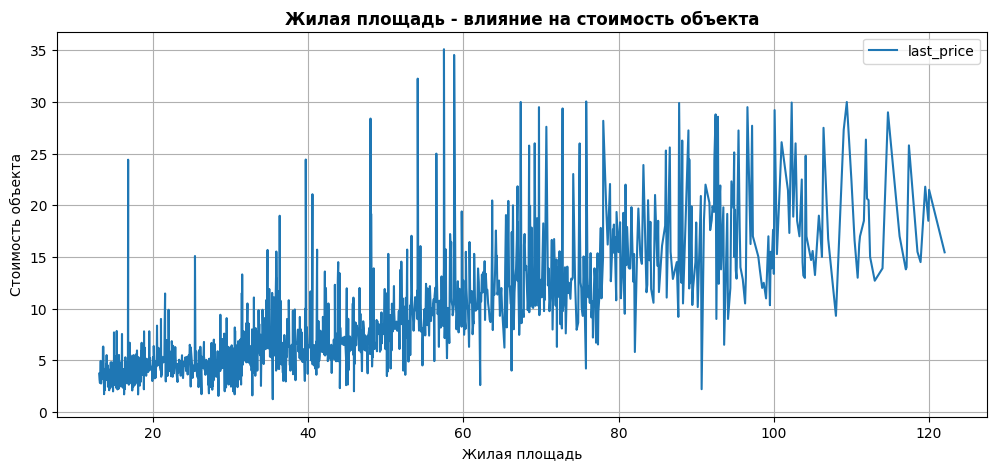

In [110]:
# вывод графика с pivot_table()
clean_df.pivot_table(index='living_area', values='last_price').plot(grid=True, figsize=(12, 5))

# Установка заголовка графика
plt.title('Жилая площадь - влияние на стоимость объекта', weight='bold')
# Добавление подписи для оси Y
plt.ylabel('Стоимость объекта')
# Добавление подписи для оси X
plt.xlabel('Жилая площадь')

Выведем график для оценки влияния площади кухни на стоимость объекта с помощью сводной таблицы

Text(0.5, 0, 'Площадь кухни')

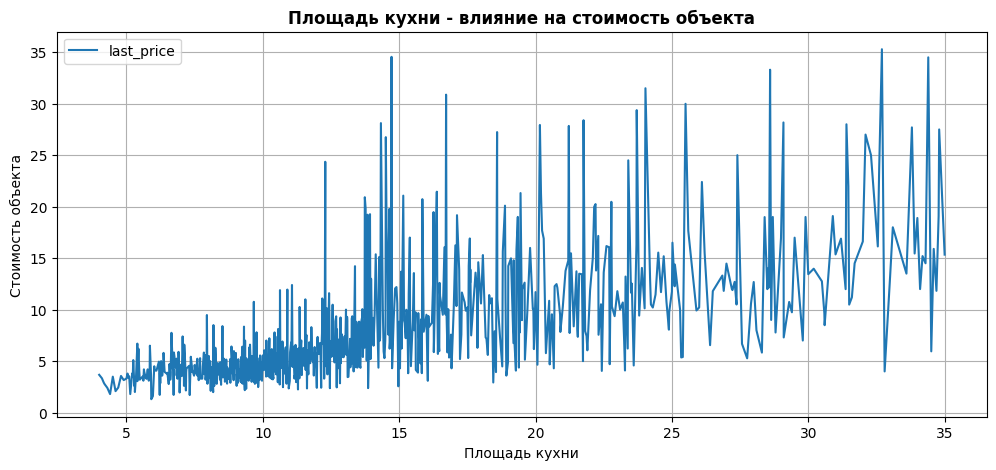

In [111]:
# вывод графика с pivot_table()
clean_df.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, figsize=(12, 5))

# Установка заголовка графика
plt.title('Площадь кухни - влияние на стоимость объекта', weight='bold')
# Добавление подписи для оси Y
plt.ylabel('Стоимость объекта')
# Добавление подписи для оси X
plt.xlabel('Площадь кухни')

Так как графики не дают однозначного представления о влиянии площадей на стоимость объекта,\
выведем диаграмму рассеяния.

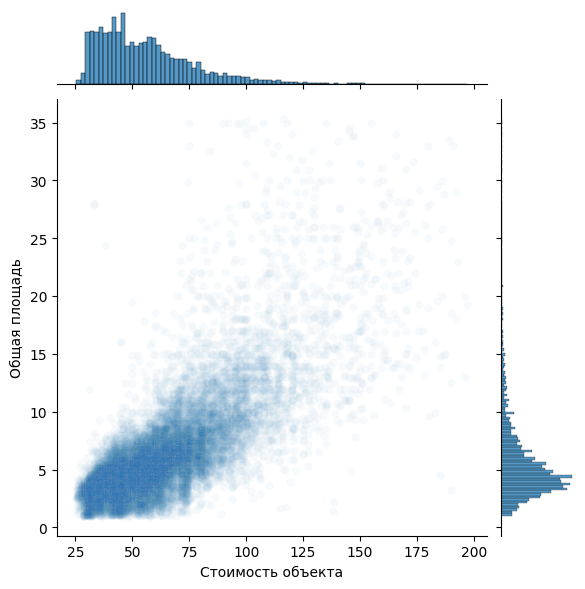

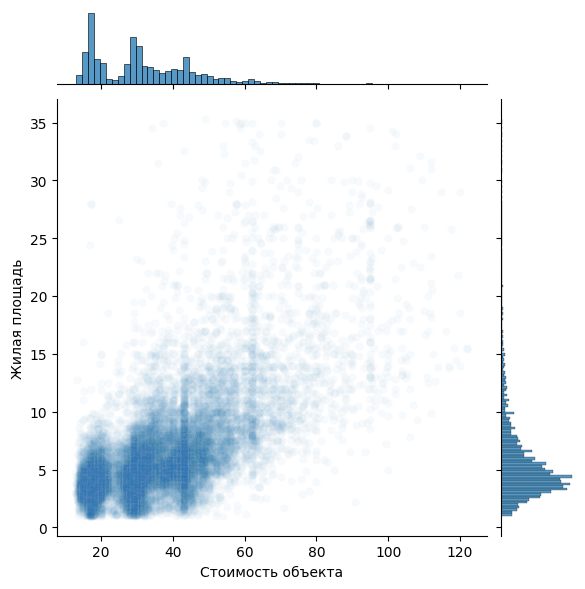

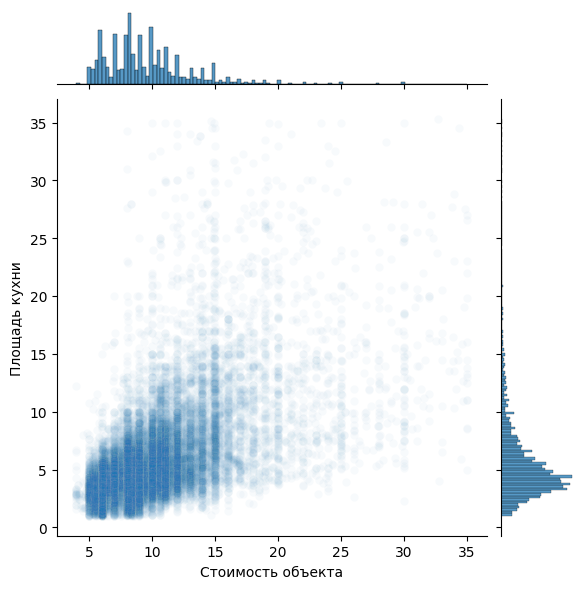

In [112]:
# вывод диаграмм рассеявания
target_column = 'last_price'
other_columns = {
    'total_area': 'Общая площадь',
    'living_area': 'Жилая площадь',
    'kitchen_area': 'Площадь кухни'
}

for col in other_columns:
    joint = sns.jointplot(data=clean_df, y=target_column, x=col, kind="scatter", alpha=0.03)
    joint.set_axis_labels('Стоимость объекта', other_columns.get(col))

Очевидно, что при значениях общей площади менее примерно 80 кв.м,\
наблюдается определенная взаимосвязь между двумя величинами,\
выраженная в положительной корреляции.

Подтвердим это:

Text(0.5, 0, 'Общая площадь')

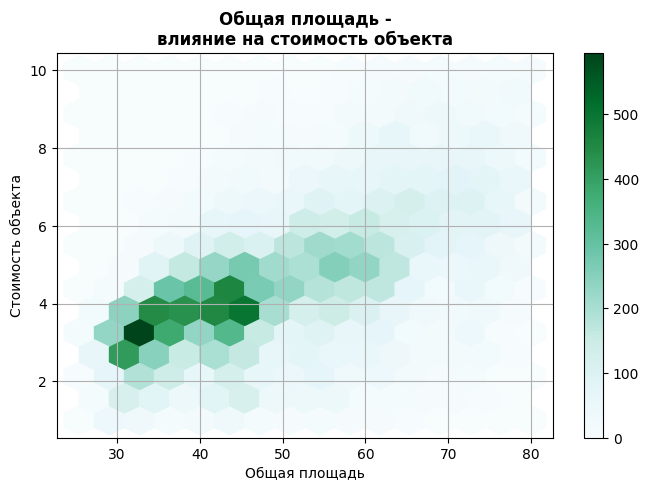

In [128]:
# построение графика с условиями
(
    clean_df[(clean_df['total_area'] < 80) & (clean_df['last_price'] < 10)]
    .plot(x='total_area', y='last_price', kind='hexbin', gridsize=15, figsize=(8, 5), sharex=False, grid=True)
)

# Установка заголовка графика
plt.title('Общая площадь -\nвлияние на стоимость объекта', weight='bold')
# Добавление подписи для оси Y
plt.ylabel('Стоимость объекта')
# Добавление подписи для оси X
plt.xlabel('Общая площадь')

На графике видна повышенная частота сочетания значений\
для `'total_area'` менее 65 кв.м и `'last_price'` менее 7 млн.рублей.

Очевидно, что при значениях жилой площади менее примерно 50 кв.м,\
наблюдается определенная взаимосвязь между двумя величинами,\
выраженная в умеренной положительной корреляции.

Очевидно, что при значениях площади кухни менее примерно 13 кв.м,\
наблюдается определенная взаимосвязь между двумя величинами,\
выраженная в умеренной положительной корреляции.

Также выведем коэффициенты корреляции:

In [114]:
# вывод коэффициента корреляции
clean_df[['total_area', 'living_area', 'kitchen_area', 'last_price']].corr()['last_price'].round(2)

total_area      0.77
living_area     0.66
kitchen_area    0.57
last_price      1.00
Name: last_price, dtype: float64

***

**Вывод:**

1. На стоимость объекта в большей степени оказывает влияние общая площадь объекта:
   - коэффициент корреляции 0,77
2. В их взаимосвязи нет прямой линейной зависимости:
   - с увеличением общей площади до значений примерно в 65 кв.м стоимость растет;
   - далее взаимосвязь общей площади и стоимость перестает быть устойчивой.
3. Наименьшее влияние на стоимость объекта из площадей оказывает площадь кухни:
   - коэффициент корреляции 0,57

### Количество комнат - влияние на стоимость объекта

Оценим влияние количества комнат на стоимость объекта, применив сводную таблицу.

Text(0.5, 0, 'Количество комнат')

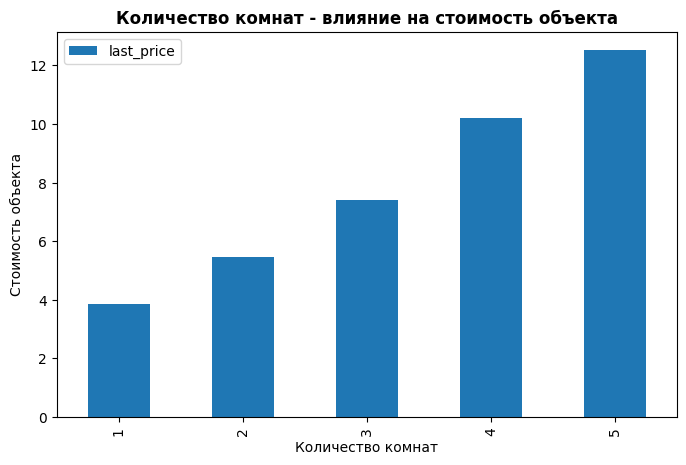

In [115]:
# вывод графика с pivot_table()
clean_df.pivot_table(index='rooms', values='last_price').plot(kind='bar', figsize=(8, 5))

# Установка заголовка графика
plt.title('Количество комнат - влияние на стоимость объекта', weight='bold')
# Добавление подписи для оси Y
plt.ylabel('Стоимость объекта')
# Добавление подписи для оси X
plt.xlabel('Количество комнат')

Очевидно влияние количества комнат на стоимость объекта,\
так как с увеличением количества комнат увеличиваются и площади объекта,\
которые влияют на стоимость.

### Тип этажа - влияние на стоимость объекта

Оценим влияние типа этажа на стоимость объекта, применив сводную таблицу.

Text(0.5, 0, 'Тип этажа')

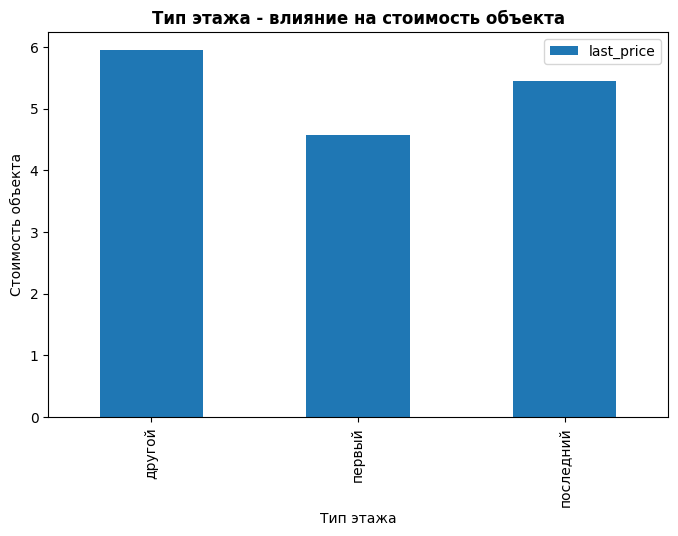

In [116]:
# вывод графика с pivot_table()
clean_df.pivot_table(index='type_floor', values='last_price').plot(kind='bar', figsize=(8, 5))

# Установка заголовка графика
plt.title('Тип этажа - влияние на стоимость объекта', weight='bold')
# Добавление подписи для оси Y
plt.ylabel('Стоимость объекта')
# Добавление подписи для оси X
plt.xlabel('Тип этажа')

На графике заметно, что тип этажа "другой" - самый дорогой.\
Первый этаж - с самой меньшей стоимостью.

### День недели размещения - влияние на стоимость объекта

Оценим влияние дня недели размещения объявления на стоимость объекта, применив сводную таблицу.

Text(0.5, 0, 'День недели')

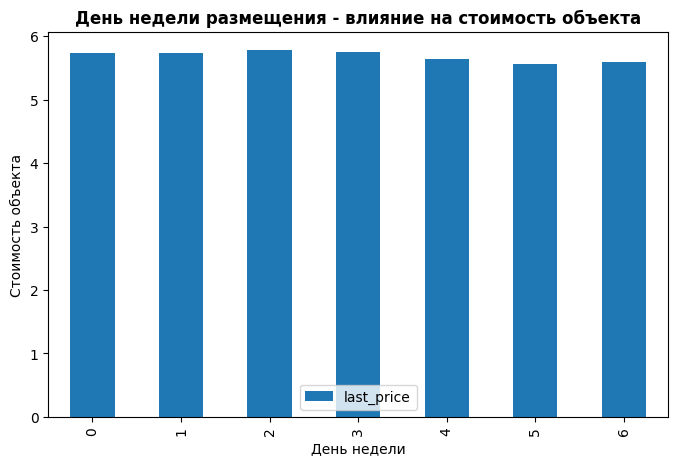

In [117]:
# вывод графика с pivot_table()
clean_df.pivot_table(index='weekday_number', values='last_price').plot(kind='bar', figsize=(8, 5))

# Установка заголовка графика
plt.title('День недели размещения - влияние на стоимость объекта', weight='bold')
# Добавление подписи для оси Y
plt.ylabel('Стоимость объекта')
# Добавление подписи для оси X
plt.xlabel('День недели')

Никакого влияния на стоимость объекта день размещения объявления не оказывает.

### Месяц размещения - влияние на стоимость объекта

Оценим влияние месяца размещения объявления на стоимость объекта, применив сводную таблицу.

Text(0.5, 0, 'Месяц размещения')

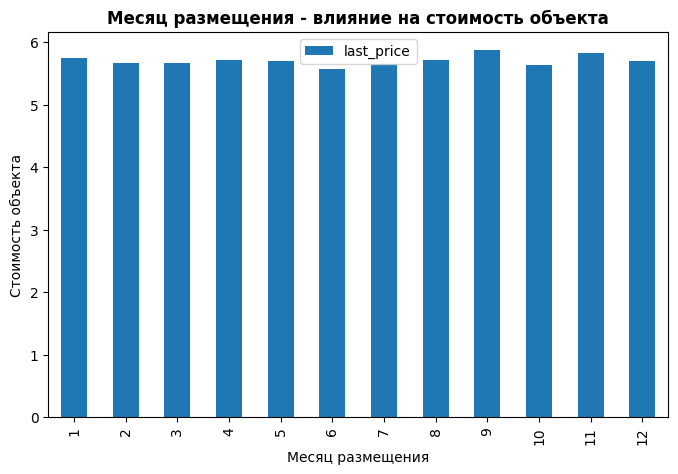

In [118]:
# вывод графика с pivot_table()
clean_df.pivot_table(index='month', values='last_price').plot(kind='bar', figsize=(8, 5))

# Установка заголовка графика
plt.title('Месяц размещения - влияние на стоимость объекта', weight='bold')
# Добавление подписи для оси Y
plt.ylabel('Стоимость объекта')
# Добавление подписи для оси X
plt.xlabel('Месяц размещения')

Никакого влияния на стоимость объекта месяц размещения объявления не оказывает.

### Год размещения - влияние на стоимость объекта

Оценим влияние года размещения объявления на стоимость объекта, применив сводную таблицу.

Text(0.5, 0, 'Год размещения')

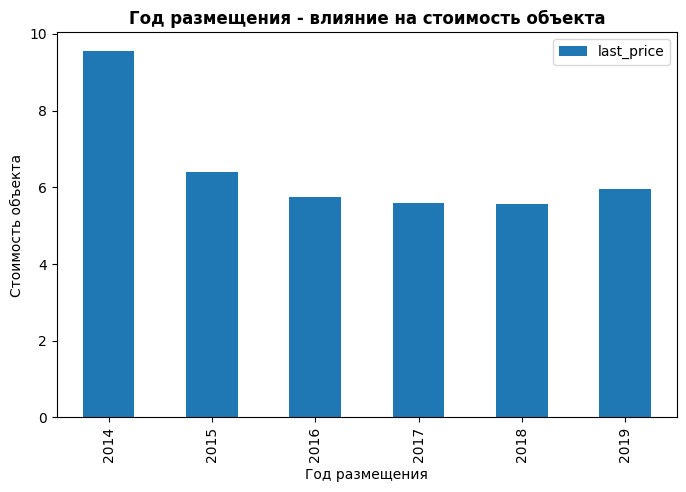

In [119]:
# вывод графика с pivot_table()
clean_df.pivot_table(index='year', values='last_price').plot(kind='bar', figsize=(8, 5))

# Установка заголовка графика
plt.title('Год размещения - влияние на стоимость объекта', weight='bold')
# Добавление подписи для оси Y
plt.ylabel('Стоимость объекта')
# Добавление подписи для оси X
plt.xlabel('Год размещения')

На графике заметна большая стоимость объектов,\
объявления о продаже которых размещены в 2014 году.

***

**Вывод:**

Факторы, оказывающие влияние на стоимость объекта:
- площади объекта, особенно общая площадь;
- количество комнат, так как эта величина коррелирует с плолщадью объекта;
- тип этажа квартиры: самый дорогой - это не первый и не последний этажи.

## Подсчёт средней цены квадратного метра

Выделим населенные пункты с наибольшим количеством объявлений

In [120]:
# запись в новый датафрейм по условию
support_df = (
    clean_df['locality_name']
    .value_counts()
    .head(10)
    .reset_index()
)
# вывод датафрейма
support_df

,locality_name,count
0,Санкт-Петербург,14696
1,Мурино посёлок,490
2,Шушары посёлок,418
3,Всеволожск,384
4,Пушкин,356
5,Колпино,334
6,Парголово посёлок,306
7,Гатчина,305
8,Кудрово деревня,265
9,Выборг,226


Запишем в отдельный датафрейм данные только по выбранным населенным пунктам

In [121]:
# запись в новый датафрейм по условию
sq_meter_df = clean_df.query('(locality_name in @support_df["locality_name"]) == True')

# вывод отсортированных значений среднего
sq_meter_df = (
    sq_meter_df
    .groupby('locality_name')['sq_meter_price']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
sq_meter_df

,locality_name,sq_meter_price
0,Санкт-Петербург,110410.230199
1,Пушкин,102868.457865
2,Кудрово деревня,92209.803774
3,Парголово посёлок,89974.696078
4,Мурино посёлок,84170.0
5,Шушары посёлок,77544.866029
6,Колпино,75208.45509
7,Гатчина,68865.862295
8,Всеволожск,68734.388021
9,Выборг,58189.345133


Выделим населенные пункты с самой высокой и низкой стоимостью квадратного метра:

In [122]:
print(f'Самая высокая стоимость квадратного метра среди выбранных населенных пунктов -\n'
      f'{round(sq_meter_df["sq_meter_price"].max())} руб. - '
      f'в населенном пункте {sq_meter_df.loc[0, "locality_name"]}.')
print(' ')
print(f'Самая низкая стоимость квадратного метра среди выбранных населенных пунктов -\n'
      f'{round(sq_meter_df["sq_meter_price"].min())} руб. - '
      f'в населенном пункте {sq_meter_df.loc[9, "locality_name"]}.')

Самая высокая стоимость квадратного метра среди выбранных населенных пунктов -
110410 руб. - в населенном пункте Санкт-Петербург.
 
Самая низкая стоимость квадратного метра среди выбранных населенных пунктов -
58189 руб. - в населенном пункте Выборг.


***

**Вывод:**

1. Была посчитана средняя цена квадратного метра в 10 населенных пунктах\
   с наибольшим количеством объявлений.
2. Были выделены населенные пункты с самой высокой и низкой стоимостью квадратного метра.

## Подсчет средней цены километра расстояния до центра

Запишем в датафрейм данные только для Санкт-Петербурга\
и рассчитаем стоимость каждого километра удаления от центра\
с записью в новый столбец.

In [123]:
# запись в новый датафрейм по условию
city_df = clean_df[clean_df['locality_name'] == 'Санкт-Петербург']
# создание нового столбца вычислением
city_df['price_km'] = city_df['last_price']*1000/city_df['city_center_distance']
city_df['price_km'] = round(city_df['price_km'], 3)

Вычислим среднюю цену каждого километра:

In [124]:
# вычисление средней цены
print(f'Средняя цена каждого километра составляет {city_df["price_km"].mean().round()} тыс.рублей')

Средняя цена каждого километра составляет 1006.0 тыс.рублей


Причем средняя цена для 10-ти наиболее близких к центру объектов:

In [125]:
# вычисление средней цены по условию
print(city_df.query('index in @city_df["city_center_distance"].sort_values().head(10).index')['price_km'].mean().round())

62440.0


А средняя цена для 10-ти наиболее удаленных от центра объектов:

In [126]:
# вычисление средней цены по условию
print(city_df.query('index in @city_df["city_center_distance"].sort_values().tail(10).index')['price_km'].mean().round())

169.0


Text(0.5, 0, 'Цена километра')

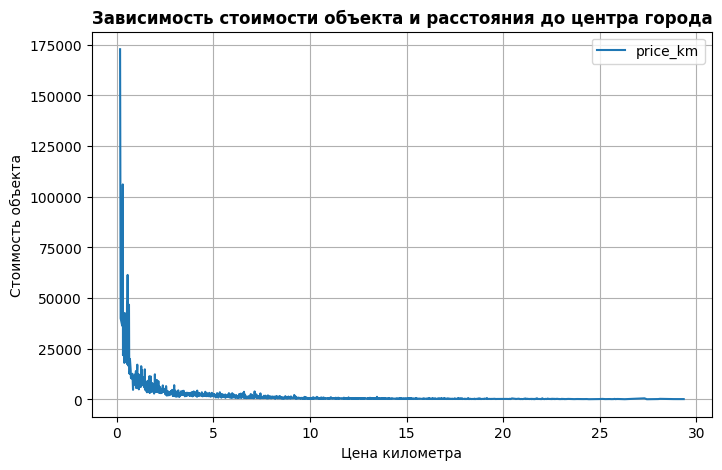

In [127]:
# вывод графика с pivot_table()
city_df.pivot_table(index='city_center_distance', values='price_km').plot(grid=True, figsize=(8, 5))

# Установка заголовка графика
plt.title('Зависимость стоимости объекта и расстояния до центра города', weight='bold')
# Добавление подписи для оси Y
plt.ylabel('Стоимость объекта')
# Добавление подписи для оси X
plt.xlabel('Цена километра')

***

**Вывод:**

1. Средняя цена каждого километра расстояния до центра для объектов в Санкт-Петербурге\
   составляет 1006,0 тыс.рублей.
2. Есть огромная разница между средней ценой 10-ти самых близких к центру объектов\
   и 10-ти самых удаленных от центра объектов: 62440,0 тыс.руб и 169,0 тыс.руб соответственно.
3. Стоимость объектов в центре очень высока, напротив стоимость объектов на окраине - относительно низкая.
4. По мере отдаления от центра стоимость объекта быстро падает

# Общий вывод

**ВХОДНЫЕ ДАННЫЕ:**

1. Исследование проведено на основе входных данных сервиса Яндекс Недвижимость — \
   архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. 
2. Был предоставлен файл с данными `real_estate_data.csv`
3. На этапе изучения общей информации о датафрейме были выявлены:
   - столбцы с некорректными наименованиями;
   - столбцы с большим количеством пропущенных значений;
   - столбцы с неправильным типом данных;
   - столбцы с аномалиями и выбросами;
4. Также было выявлено отсутствие явных дубликатов в данных.

**НА ЭТАПЕ ПРЕДОБРАБОТКИ:**

1. Были проанализированы возможные причины возникновения пропусков в данных.
2. Были переименованы столбцы с некорректными наименованиями:
   - `'cityCenters_nearest'` в `'city_centers_nearest'`
   - `'parks_around3000'` в `'parks_around_3000'`
   - `'ponds_around3000'` в `'ponds_around_3000'`
2. Некоторые пропуски в значениях из-за их небольшого количества удалось просто удалить:
   - `'floors_total'`
   - `'locality_name'`
   - `'city_centers_nearest'` для объектов в Санкт-Петербурге
   - `'airports_nearest'` для объектов в Санкт-Петербурге
3. Некоторые пропуски в значениях были заполнены значением "0":
   - количество балконов в `'balcony'`
   - `'is_apartment'`
   - `'kitchen_area'` в апартаментах и студиях
   - `'parks_around_3000'` для объектов не в Санкт-Петербурге
   - `'ponds_around_3000'` для объектов не в Санкт-Петербурге
4. Некоторые пропуски были заполнены медианными значениями с применением различных условий:
   - `'kitchen_area'` не в апартаментах и студиях
   - `'living_area'` не в апартаментах и студиях
5. Были преобразованы типы данных в столбцах:
   - `'first_day_exposition'` в datetime64[ns]
   - `'balcony'` в Int64
   - `'floors_total'` в Int64
   - `'is_apartment'` в bool
6. Были преобразованы типы данных в Int64 с сохранением пропусков:
   - `'airports_nearest'`
   - `'city_centers_nearest'`
   - `'parks_around_3000'`
   - `'parks_nearest'`
   - `'ponds_around_3000'`
   - `'ponds_nearest'`
   - `'days_exposition'`
7. Была изменена единица измерения в столбце `'last_price'`
8. Были устранены неявные дубликаты в названиях населенных пунктов
9. Аномальные значения частично были обработаны - восстановлены корретные значения:
   - `'ceiling_height'`
   - `'kitchen_area'`
   - `'living_area'`
10. Аномальные значения частично были удалены:
   - `'ceiling_height'`
   - `'living_area'`
   - `'total_area'`
   - `'floors_total'`
11. Были заполнены пропуски в столбце `'ceiling_height'` медианными значениями\
    по населенным пунктам.
12. Оставшиеся пропуски в столбце `'ceiling_height'` были заполнены медианными значениями\
    по следующим видам населенных пунктов: деревня, посёлок, село и товарищество.
13. Были выведены количественные результаты предобработки.
14. Были добавлены в датафрейм новые столбцы:
   - `'sq_meter_price'`
   - `'weekday_number'`
   - `'month'`
   - `'year'`
   - `'type_floor'`
   - `'city_center_distance'`
15. Был подготовлен новый датафрейм с очищенными от выбросов данными для дальнейшего анализа.


**АНАЛИЗ:**

1. Были изучены параметры объектов с помощью гистограмм и численных методов.

**Изучение времени продажи объектов:**
1. Обычно продажа занимает 95 дней - медианное значение `'days_exposition'`
2. Наибольшее количество значений приходится на список:
   - 45 дней
   - 60 дней
   - 7 дней
   - 30 дней
   - 90 дней
3. Возможно, эта продолжительность размещения объявлений связана с модерацией, но не с продажей объекта.
4. Необычно долгими можно назвать продажи, доля которых в датафрейме менее 10%:
   - это продажи, занимающие более 460 дней.
5. Необычно быстрыми можно назвать продажи, доля которых в датафрейме менее 10%:
   - это продажи, занимающие менее 17 дней.

**Изучение влияния факторов на стоимость объектов:**
1. Факторы, оказывающие влияние на стоимость объекта:
   - площади объекта, особенно общая площадь;
   - количество комнат, так как эта величина коррелирует с плолщадью объекта;
   - тип этажа квартиры: самый дорогой - это не первый и не последний этажи.
2. На стоимость объекта в большей степени оказывает влияние общая площадь объекта:
   - коэффициент корреляции 0,77
3. Наименьшее влияние на стоимость объекта из площадей оказывает площадь кухни:
   - коэффициент корреляции 0,57

**Подсчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:**
1. Была посчитана средняя цена квадратного метра в 10 населенных пунктах\
   с наибольшим количеством объявлений.
2. Были выделены населенные пункты с самой высокой и низкой стоимостью квадратного метра:
   - Самая высокая стоимость - 110410 руб. в Санкт-Петербурге.
   - Самая низкая стоимость - 58189 руб. в Выборге.

**Изучение влияния расстояния до центра города на стоимость объектов:**
1. Средняя цена каждого километра расстояния до центра для объектов в Санкт-Петербурге\
   составляет 1006,0 тыс.рублей.
2. Есть огромная разница между средней ценой 10-ти самых близких к центру объектов\
   и 10-ти самых удаленных от центра объектов: 62440,0 тыс.руб и 169,0 тыс.руб соответственно.
3. Стоимость объектов в центре очень высока, напротив стоимость объектов на окраине - относительно низкая.
4. По мере отдаления от центра стоимость объекта быстро падает

**ВЫВОД:**
1. На стоимость объектов наибольшее влияние оказывают:
   - площади объекта, особенно общая;
   - тип этажа объекта;
   - локация объекта - в каком населенном пункте находится;
   - локация объекта - насколько объект удален от центра города.
2. Совершенно не оказывают влияние на стоимость объекта:
   - дата размещения объявления.